In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
import xgboost as xgb
import lightgbm as lgb

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
sns.set_style('darkgrid')
import os



# Any results you write to the current directory are saved as output.

In [3]:
from os.path import join
train_data_path = join('./data', 'train.csv')
test_data_path = join('./data', 'test.csv')


train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

ID : 집을 구분하는 번호  
date : 집을 구매한 날짜  
price : 집의 가격(Target variable)  
bedrooms : 침실의 수  
bathrooms : 화장실의 수  
sqft_living : 주거 공간의 평방 피트(면적)  
sqft_lot : 부지의 평방 피트(면적)  
floors : 집의 층 수  
waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)  
view : 집이 얼마나 좋아 보이는지의 정도  
condition : 집의 전반적인 상태  
grade : King County grading 시스템 기준으로 매긴 집의 등급  
sqft_above : 지하실을 제외한 평방 피트(면적)  
sqft_basement : 지하실의 평방 피트(면적)  
yr_built : 지어진 년도  
yr_renovated : 집을 재건축한 년도  
zipcode : 우편번호  
lat : 위도  
long : 경도  
sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)  
sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)  

In [4]:
train_df.head(10)

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   
5   5  20150403T000000  662500.0         3       2.50         3560      9796   
6   6  20140527T000000  468000.0         2       1.00         1160      6000   
7   7  20140528T000000  310000.0         3       1.00         1430     19901   
8   8  20141007T000000  400000.0         3       1.75         1370      9680   
9   9  20150312T000000  530000.0         5       2.00         1810      4850   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   
5     1.0           0     0  ...      8        1860           1700      1965   
6     1.0           0     0  ...      7         860            300      1942   
7     1.5           0     0  ...      7        1430              0      1927   
8     1.0           0     0  ...      7        1370              0      1977   
9     1.5           0     0  ...      7        1810              0      1900   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  
5             0    98007  47.6007 -122.145           2210        8925  
6             0    98115  47.6900 -122.292           1330        6000  
7             0    98028  47.7558 -122.229           1780       12697  
8             0    98074  47.6127 -122.045           1370       10208  
9             0    98107  47.6700 -122.394           1360        4850  

[10 rows x 21 columns]

In [5]:
train_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
train_df['date'] = pd.to_datetime(train_df.date)
train_df.head()

id       date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0 2014-10-13  221900.0         3       1.00         1180      5650   
1   1 2015-02-25  180000.0         2       1.00          770     10000   
2   2 2015-02-18  510000.0         3       2.00         1680      8080   
3   3 2014-06-27  257500.0         3       2.25         1715      6819   
4   4 2015-01-15  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

-Lat, Lon => googlemap에 point를 찍어봐서 대략적인 insight를 얻어볼수있을것 같음  

-bedroom, bathroom, sqft_living은 서로 positive한 상관관계를 가지고 있을것으로 예상  
-sqft_living과, sqft_lot, floor으로 주거형태 아파트,단독주택,빌라 등으로 나눠볼수 있을것 같음  

-sqft_living15, sqft_lot15, yr_renovation, lat,lon( or zipcode )로 가격 증가폭 예상

-지하실이 주택에서의 지하실을 의미하는것인지, 아파트단지 내의 주차시설 등과 같은 지하면적을 나타내는것인지 파악해야함

In [7]:
train_df["Year"] = train_df.date.dt.year
train_df["Month"] = train_df.date.dt.month
train_df["day"] = train_df.date.dt.day
train_df["dayOfweek"] = train_df.date.dt.dayofweek

In [8]:
train_df.head(10)

id       date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0 2014-10-13  221900.0         3       1.00         1180      5650   
1   1 2015-02-25  180000.0         2       1.00          770     10000   
2   2 2015-02-18  510000.0         3       2.00         1680      8080   
3   3 2014-06-27  257500.0         3       2.25         1715      6819   
4   4 2015-01-15  291850.0         3       1.50         1060      9711   
5   5 2015-04-03  662500.0         3       2.50         3560      9796   
6   6 2014-05-27  468000.0         2       1.00         1160      6000   
7   7 2014-05-28  310000.0         3       1.00         1430     19901   
8   8 2014-10-07  400000.0         3       1.75         1370      9680   
9   9 2015-03-12  530000.0         5       2.00         1810      4850   

   floors  waterfront  view  ...  yr_renovated  zipcode      lat     long  \
0     1.0           0     0  ...             0    98178  47.5112 -122.257   
1     1.0           0     0  ...             0    98028  47.7379 -122.233   
2     1.0           0     0  ...             0    98074  47.6168 -122.045   
3     2.0           0     0  ...             0    98003  47.3097 -122.327   
4     1.0           0     0  ...             0    98198  47.4095 -122.315   
5     1.0           0     0  ...             0    98007  47.6007 -122.145   
6     1.0           0     0  ...             0    98115  47.6900 -122.292   
7     1.5           0     0  ...             0    98028  47.7558 -122.229   
8     1.0           0     0  ...             0    98074  47.6127 -122.045   
9     1.5           0     0  ...             0    98107  47.6700 -122.394   

   sqft_living15  sqft_lot15  Year  Month  day  dayOfweek  
0           1340        5650  2014     10   13          0  
1           2720        8062  2015      2   25          2  
2           1800        7503  2015      2   18          2  
3           2238        6819  2014      6   27          4  
4           1650        9711  2015      1   15          3  
5           2210        8925  2015      4    3          4  
6           1330        6000  2014      5   27          1  
7           1780       12697  2014      5   28          2  
8           1370       10208  2014     10    7          1  
9           1360        4850  2015      3   12          3  

[10 rows x 25 columns]

In [9]:
train_df = train_df.drop('date', axis = 1)
# 시계열데이터가 아니므로 date의 정보를 연,월,일 별로 나눈후 없애줘도 된다고 생각함

In [10]:
test_df.drop(["date"], axis=1, inplace =True)

id가 나타내는 정보가 전혀 필요없다고 생각되어 drop시킴  
=> 이후 data를 merge시키며 데이터의 순서가 zipcode순서로 바뀜
=> 원래의 데이터순서( 순서와 데이터간에 상관관계가 없어보임 )로 진행하기 위해 id column을 사용 

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

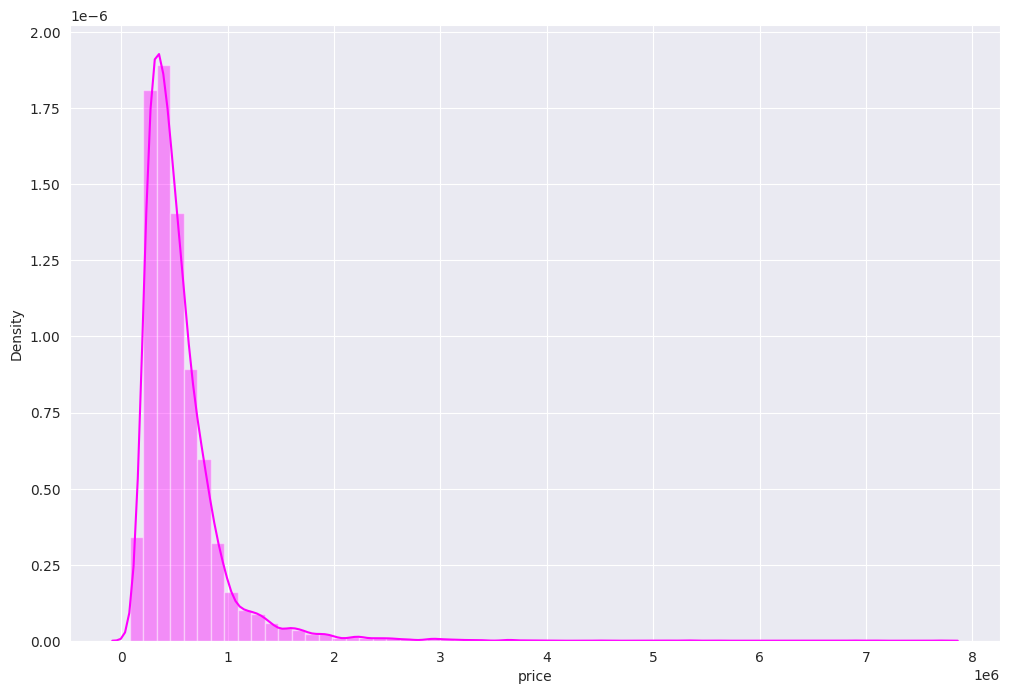

In [11]:
plt.figure(figsize = (12,8))
sns.distplot(train_df.price , kde = True, bins=60, color = "magenta") #예측변수 분포 확인 

skewed되어 있으므로 변환해줘야 함. log변환 예정

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

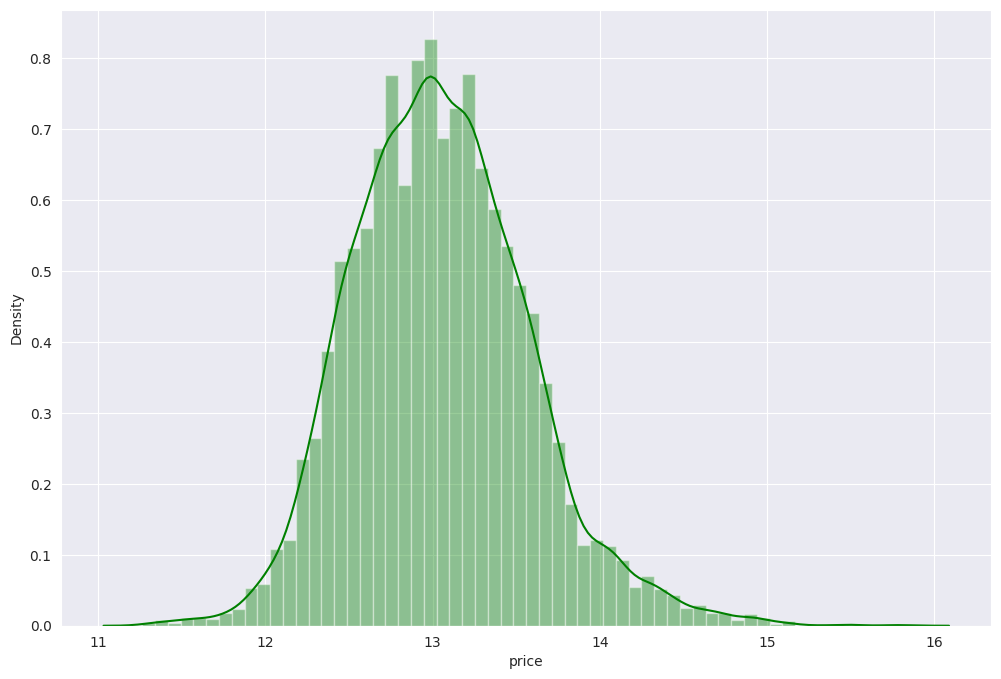

In [12]:
plt.figure(figsize = (12,8))
sns.distplot(np.log(train_df.price), kde = True, bins=60, color = "green") #log변환후 분포 확인

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

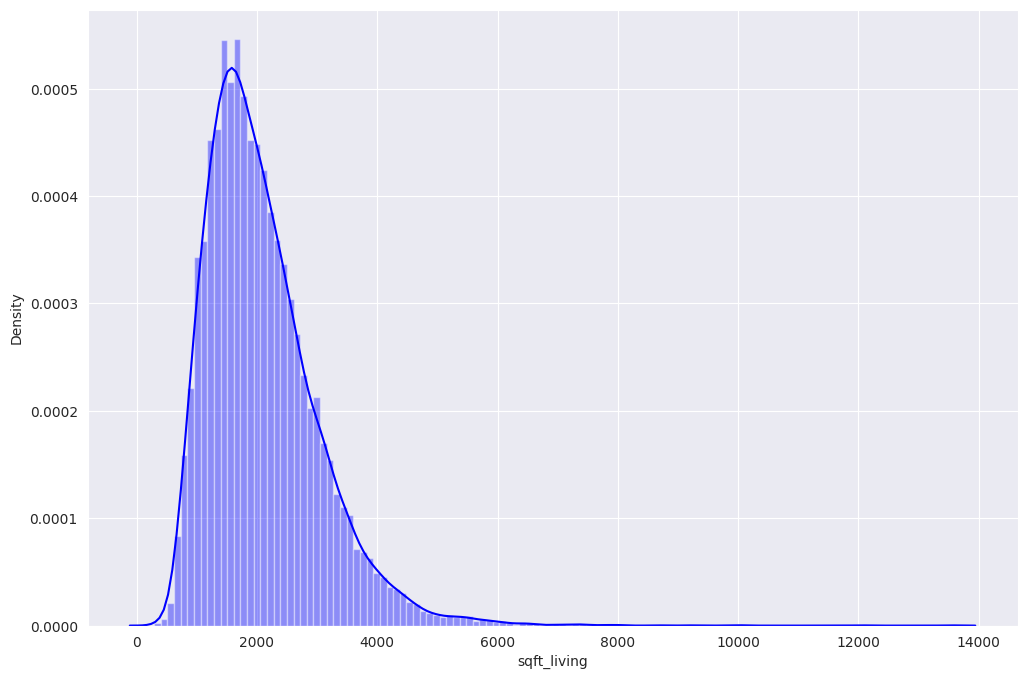

In [13]:
plt.figure(figsize = (12,8))
sns.distplot(train_df.sqft_living, kde = True, bins = 120 , color = 'blue')

모델링 하기 전에 정규화시켜줘야 할듯

<AxesSubplot:xlabel='sqft_living', ylabel='bathrooms'>

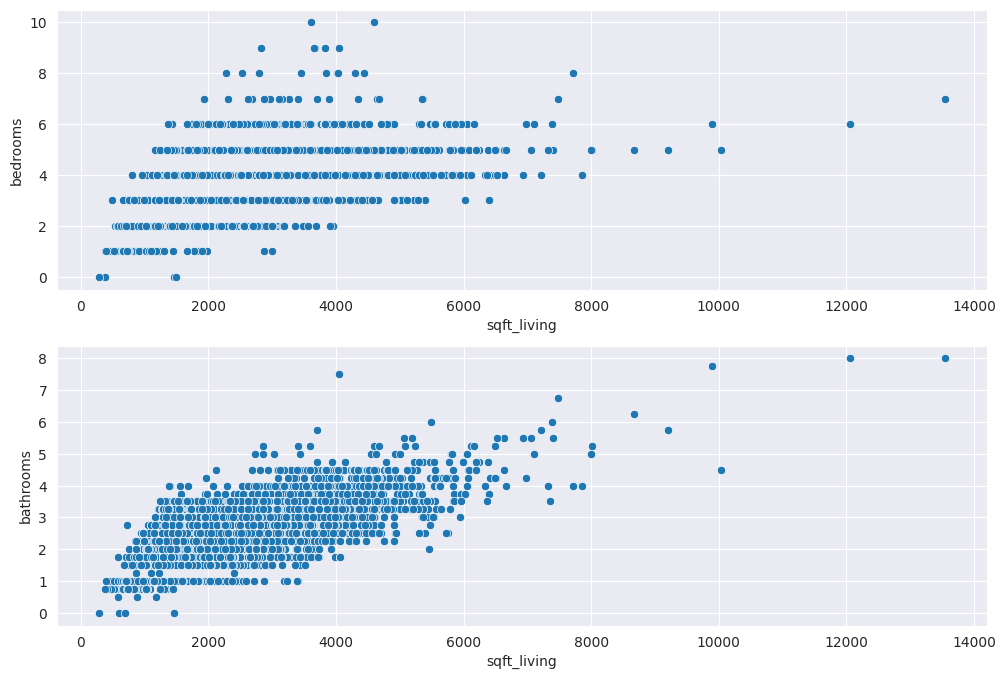

In [14]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(12,8)
sns.scatterplot(x=train_df.sqft_living, y= train_df.bedrooms, ax = axes[0]) 
sns.scatterplot(x=train_df.sqft_living, y= train_df.bathrooms, ax = axes[1])  

In [15]:
train_df.bathrooms.unique()

array([1.  , 2.  , 2.25, 1.5 , 2.5 , 1.75, 3.  , 2.75, 3.25, 4.  , 3.5 ,
       0.75, 4.75, 5.  , 4.25, 4.5 , 3.75, 5.25, 6.  , 1.25, 0.5 , 5.5 ,
       6.75, 5.75, 0.  , 8.  , 7.5 , 7.75, 6.25])

bathrooms => 소수점이 왜 나오는지??

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

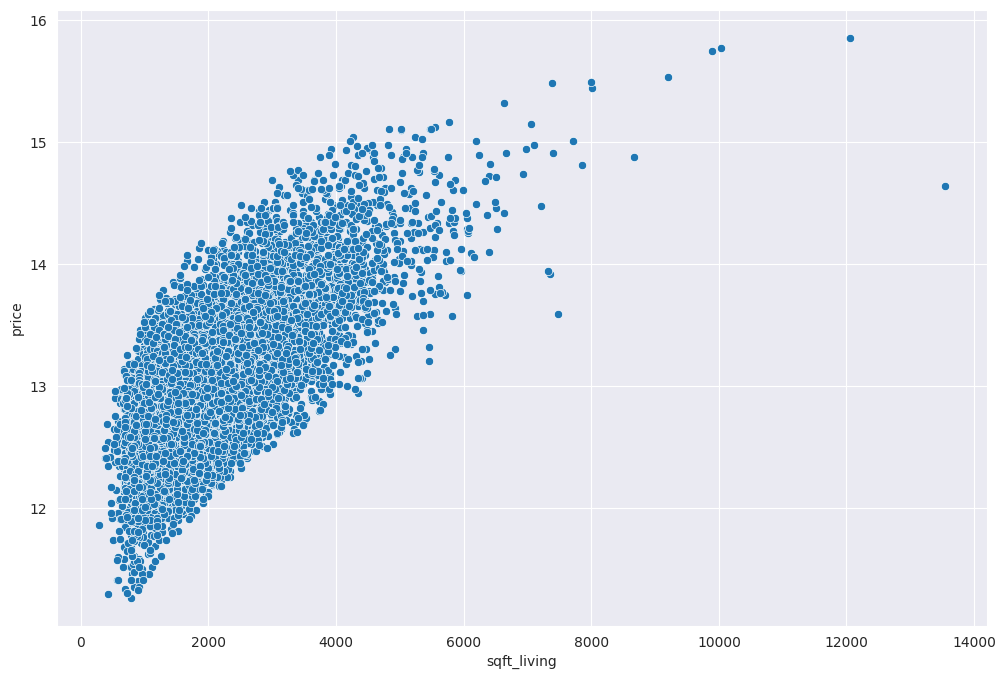

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=train_df.sqft_living, y=np.log(train_df.price))

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

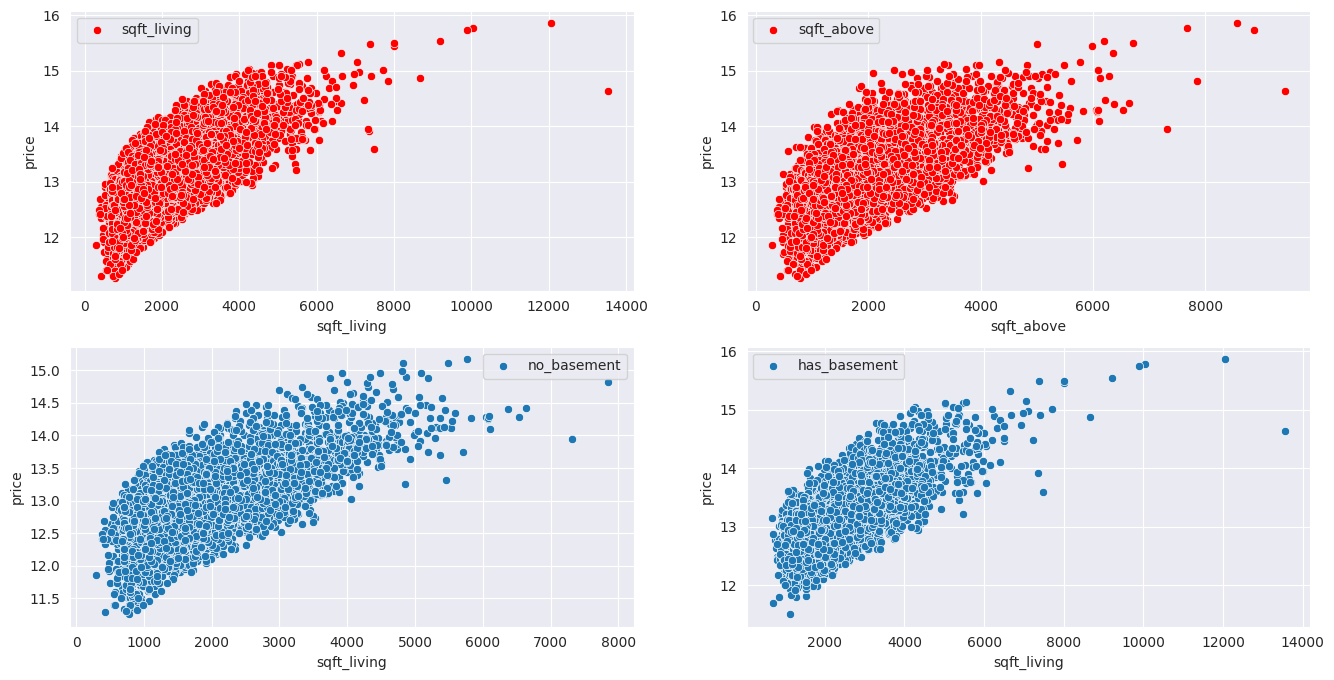

In [17]:
fig, axes = plt.subplots(nrows=2, ncols = 2)
fig.set_size_inches(16,8)

sns.scatterplot(x=train_df.sqft_living, y=np.log(train_df.price), ax = axes[0][0], color = 'red', label = "sqft_living")
sns.scatterplot(x=train_df.sqft_above, y=np.log(train_df.price), ax = axes[0][1], color = 'red', label = "sqft_above")
sns.scatterplot(x= train_df[train_df.sqft_basement == 0].sqft_living, y= np.log(train_df.price), ax=axes[1][0], label = "no_basement")
sns.scatterplot(x= train_df[train_df.sqft_basement != 0].sqft_living, y= np.log(train_df.price), ax=axes[1][1], label = "has_basement")

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

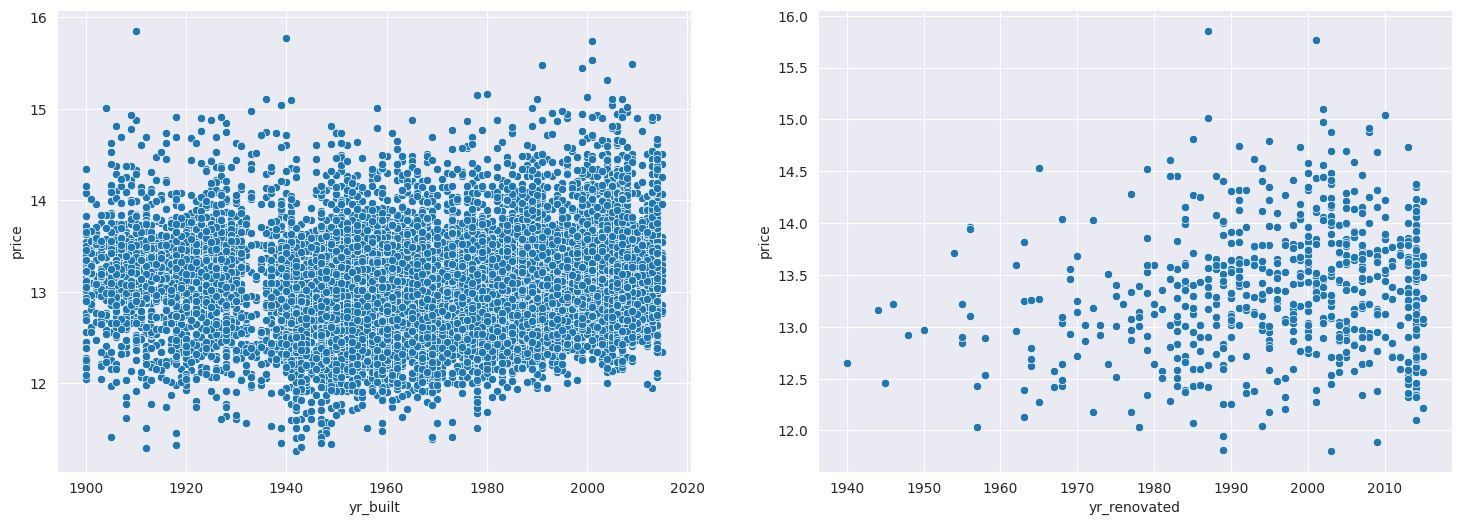

In [18]:
fig, axes = plt.subplots(ncols =2)
fig.set_size_inches(18,6)

sns.scatterplot(x=train_df.yr_built, y=np.log(train_df.price), ax = axes[0])
sns.scatterplot(x=train_df[train_df.yr_renovated != 0].yr_renovated, y=np.log(train_df[train_df.yr_renovated != 0].price), ax = axes[1])

<AxesSubplot:xlabel='yr_recent_built', ylabel='price'>

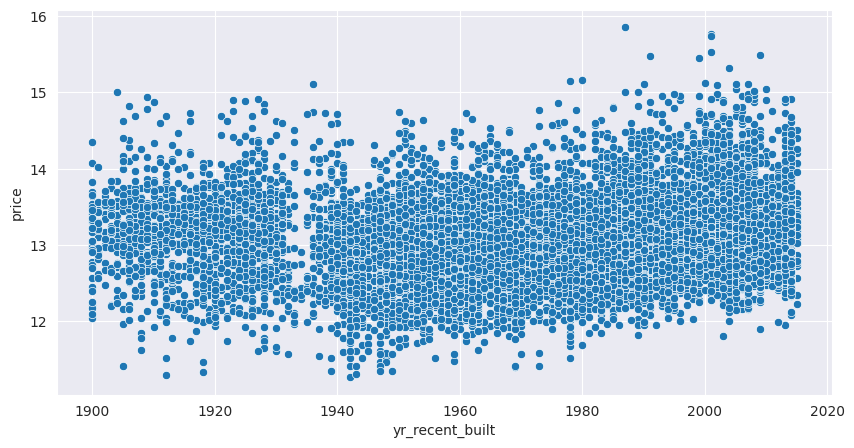

In [19]:
train_df["yr_recent_built"]=np.where(train_df.yr_built >= train_df.yr_renovated, train_df.yr_built, train_df.yr_renovated)
plt.figure(figsize = (10,5))
sns.scatterplot(x= train_df.yr_recent_built, y= np.log(train_df.price))

In [20]:
test_df["yr_recent_built"]=np.where(test_df.yr_built >= test_df.yr_renovated, test_df.yr_built, test_df.yr_renovated)

건축년도와 가격간에 상관관계는 없어보임

<AxesSubplot:xlabel='Year', ylabel='price'>

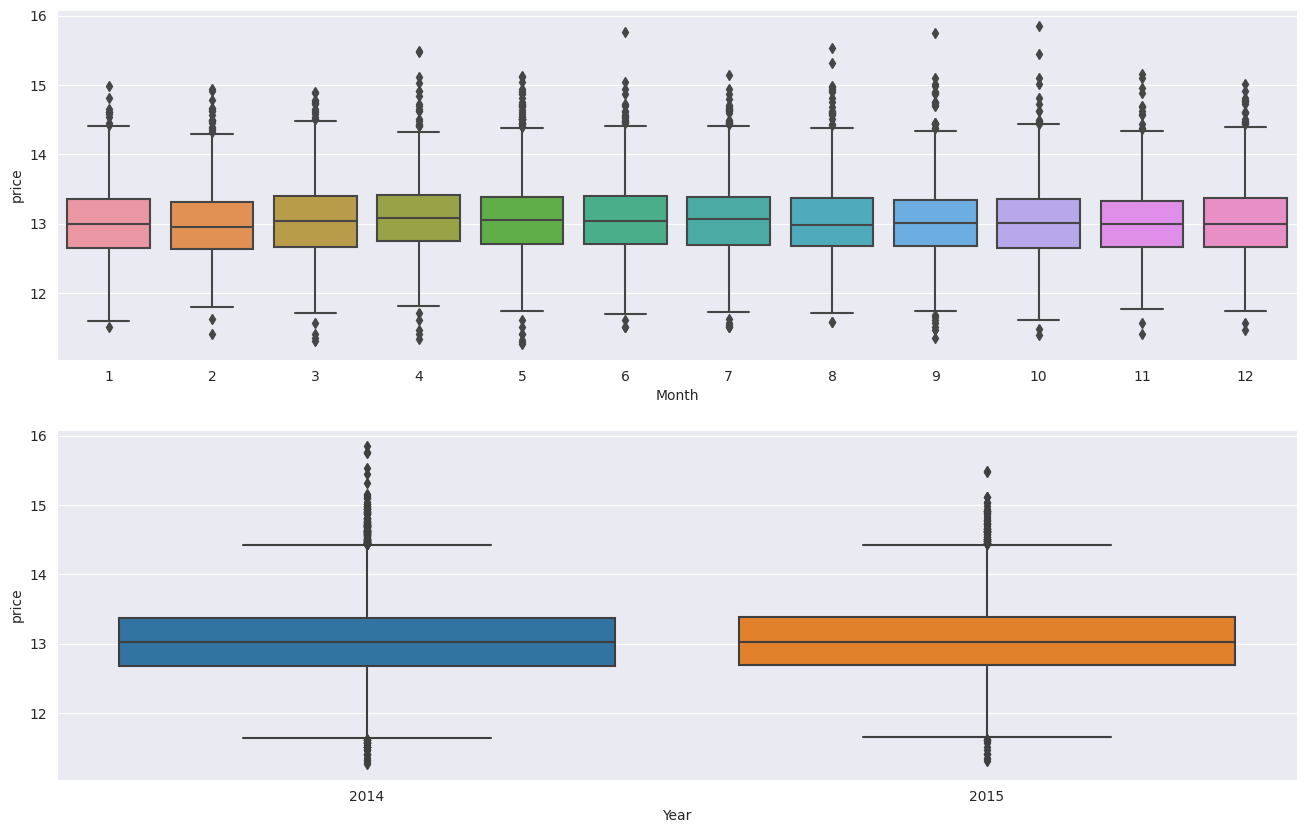

In [21]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(16,10)
sns.boxplot(x=train_df.Month , y= np.log(train_df.price), ax = axes[0])
sns.boxplot(x=train_df.Year, y=np.log(train_df.price), ax = axes[1])

팔린 시기와는 전혀 연관성 없어보임 => 변수 제거

In [22]:
train_df.drop(["Year","Month", "day", "dayOfweek"], axis=1, inplace = True)

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


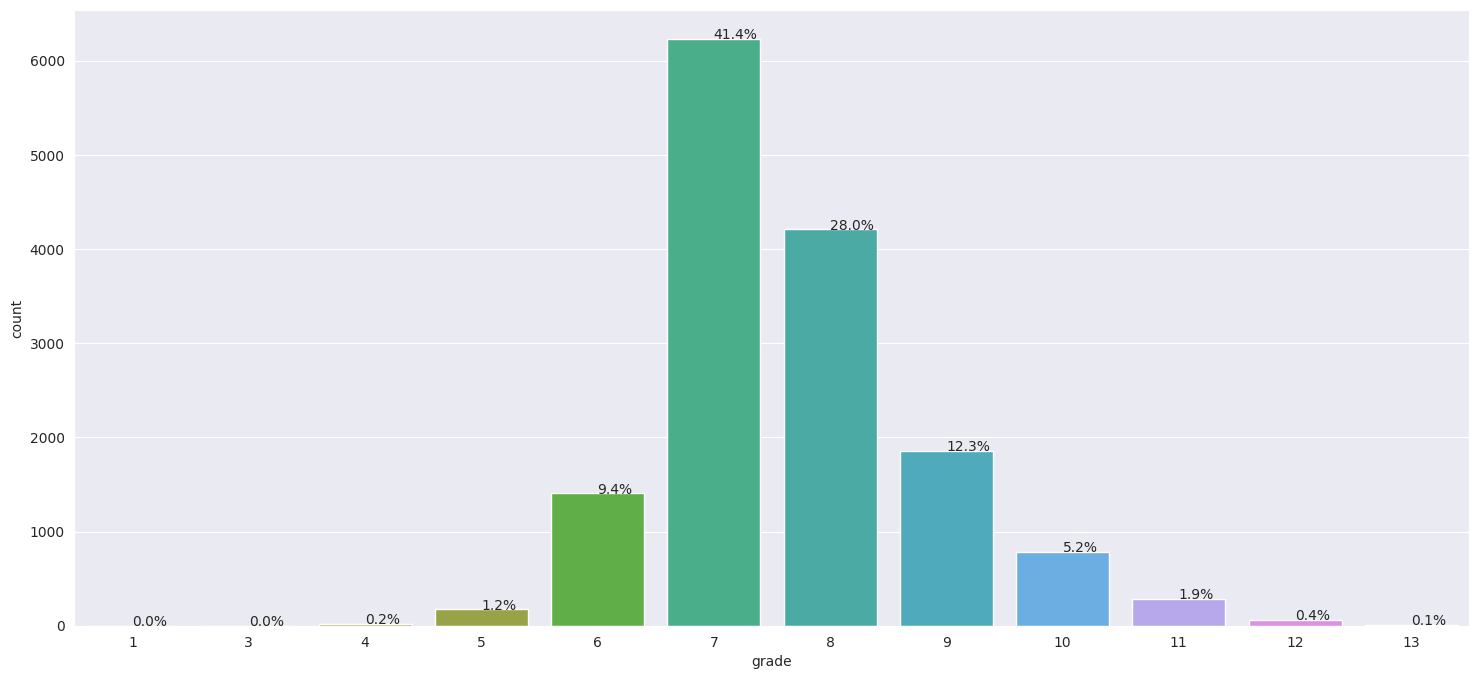

In [23]:
plt.figure(figsize = (18,8))
cnt_plot = sns.countplot(train_df.grade)
ncount = len(train_df)
for p in cnt_plot.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    cnt_plot.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y))

grade별 분포

<AxesSubplot:xlabel='grade', ylabel='price'>

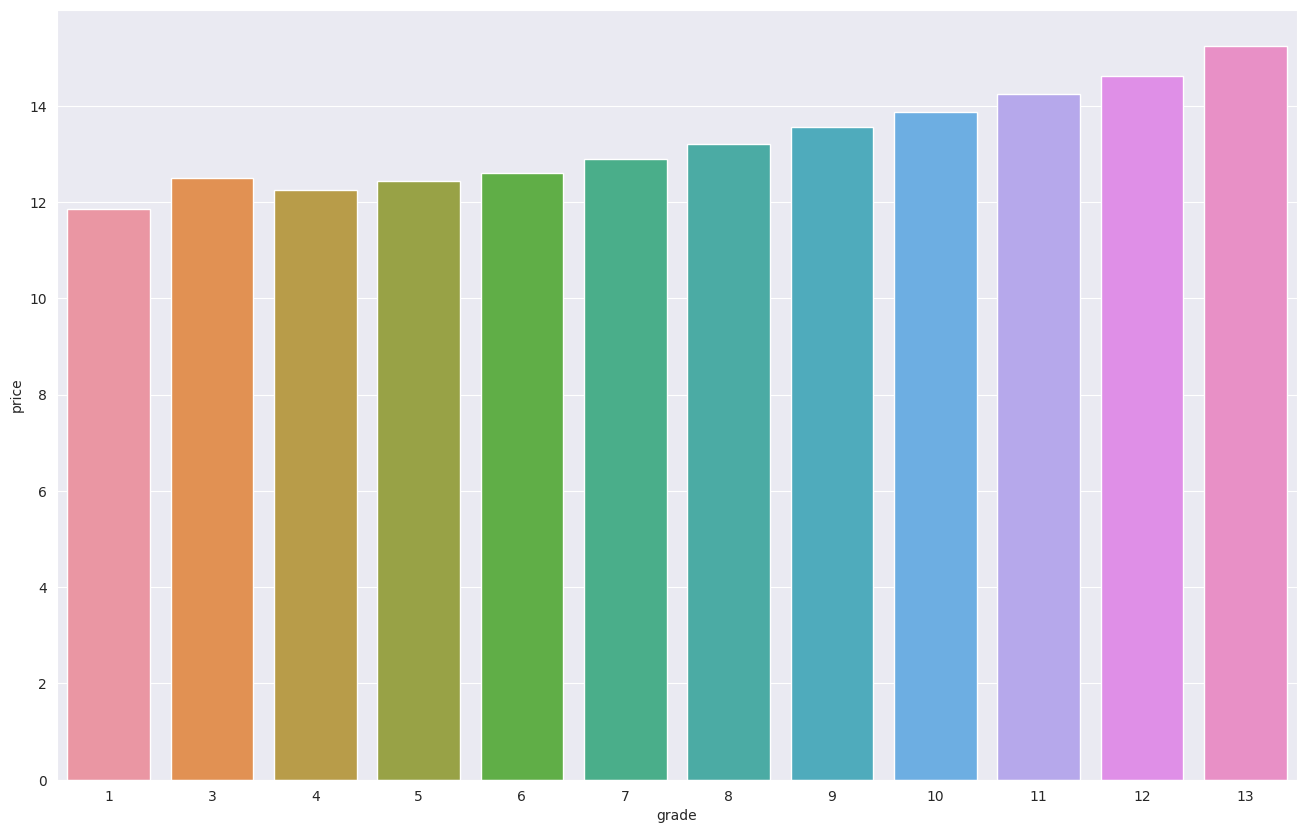

In [24]:
logprice_by_grade = np.log(train_df[["grade","price"]].groupby("grade").mean()).reset_index()
plt.figure(figsize=(16,10))
sns.barplot(x="grade" , y="price", data = logprice_by_grade)

In [25]:
price_by_grade = train_df[["grade","price"]].groupby("grade").mean().reset_index()
price_by_grade["tmp"] = price_by_grade.price.shift()
price_by_grade

grade         price           tmp
0       1  1.420000e+05           NaN
1       3  2.710000e+05  1.420000e+05
2       4  2.097413e+05  2.710000e+05
3       5  2.510696e+05  2.097413e+05
4       6  3.001554e+05  2.510696e+05
5       7  4.015281e+05  3.001554e+05
6       8  5.423156e+05  4.015281e+05
7       9  7.734781e+05  5.423156e+05
8      10  1.062482e+06  7.734781e+05
9      11  1.522459e+06  1.062482e+06
10     12  2.220540e+06  1.522459e+06
11     13  4.132333e+06  2.220540e+06

In [26]:
price_by_grade.loc[0,"tmp"] = 0 
price_by_grade["Flactuation_rate"] = (price_by_grade.price-price_by_grade.tmp)/price_by_grade.price * 100
price_by_grade = price_by_grade.drop("tmp", axis=1)
price_by_grade = price_by_grade.set_index("grade")
price_by_grade 

price  Flactuation_rate
grade                                
1      1.420000e+05        100.000000
3      2.710000e+05         47.601476
4      2.097413e+05        -29.206787
5      2.510696e+05         16.460899
6      3.001554e+05         16.353449
7      4.015281e+05         25.246724
8      5.423156e+05         25.960442
9      7.734781e+05         29.886108
10     1.062482e+06         27.200858
11     1.522459e+06         30.212739
12     2.220540e+06         31.437446
13     4.132333e+06         46.264257

grade가 1 올라갈때마다 평균적으로 가격 상승폭 계산

<AxesSubplot:xlabel='grade', ylabel='price'>

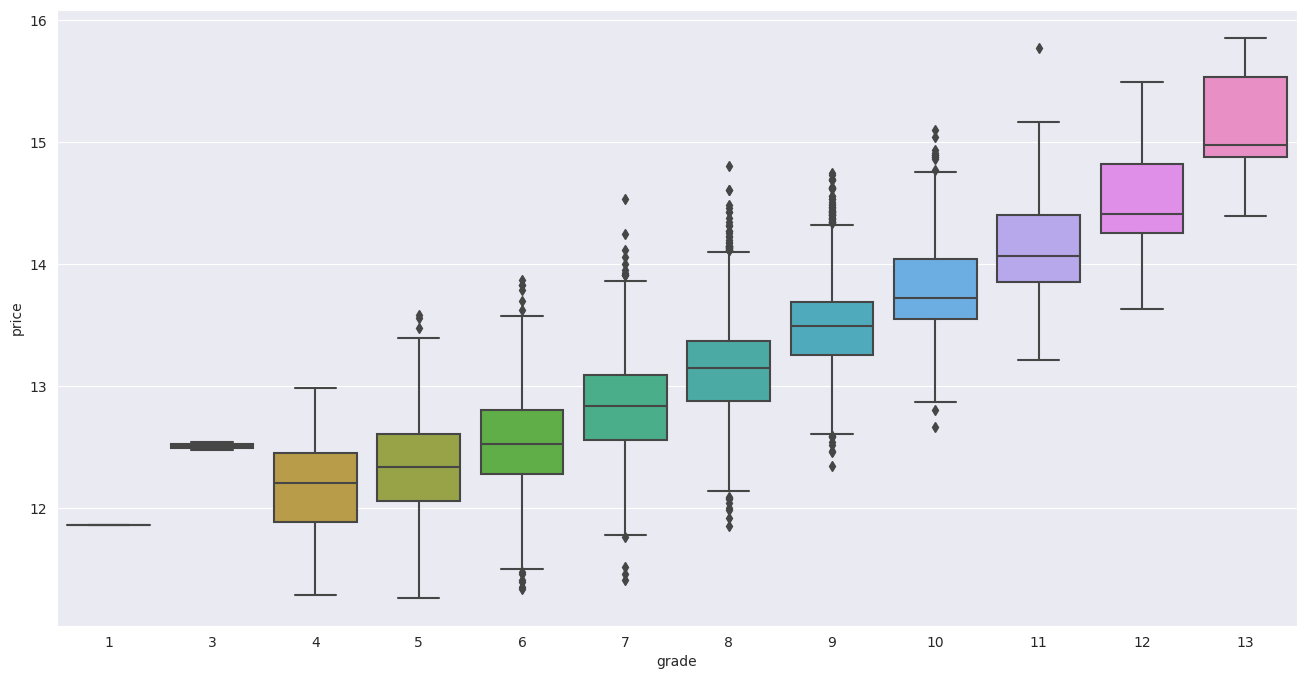

In [27]:
plt.figure(figsize = (16,8))

sns.boxplot(x = train_df.grade , y=np.log(train_df.price))

위의 barplot보다 차이가 명확히 보임

In [28]:
train_df[train_df.grade.isin([1,3])]

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2302    2302  262000.0         1       0.75          520     12981     1.0   
4123    4123  280000.0         1       0.00          600     24501     1.0   
13522  13522  142000.0         0       0.00          290     20875     1.0   

       waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
2302            0     0          5  ...         520              0      1920   
4123            0     0          2  ...         600              0      1950   
13522           0     0          1  ...         290              0      1963   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
2302              0    98022  47.2082 -121.995           1340       12233   
4123              0    98045  47.5316 -121.749            990       22549   
13522             0    98024  47.5308 -121.888           1620       22850   

       yr_recent_built  
2302              1920  
4123              1950  
13522             1963  

[3 rows x 21 columns]

grade가 1 또는 3인 data가 3개밖에 없음. 제거해도 큰 상관은 없을듯?

<AxesSubplot:xlabel='view', ylabel='price'>

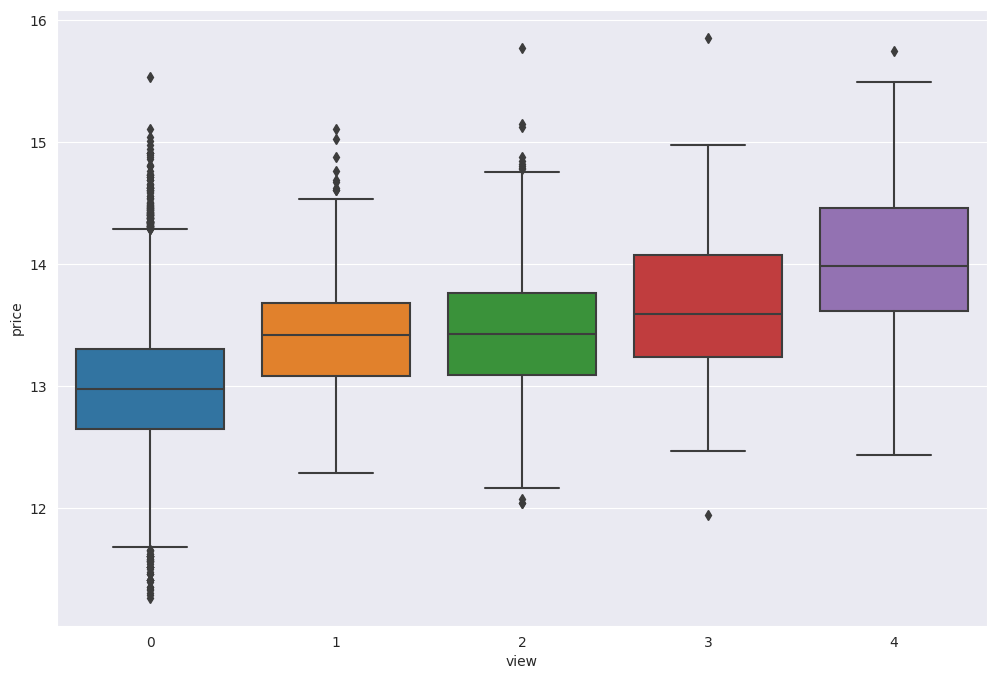

In [29]:
plt.figure(figsize = (12,8))
sns.boxplot(x= train_df.view, y= np.log(train_df.price))

waterfront이면 view가 높은가? 

In [30]:
train_df[["view", "waterfront"]].groupby("view").mean()

waterfront
view            
0       0.000000
1       0.004149
2       0.007519
3       0.037534
4       0.418269

View 점수가 4점인 집들 중 40%는 강이 보임  
waterfront의 유무가 view점수에 큰 영향을 미치는것으로 생각 할 수 있을듯함

In [31]:
pd.DataFrame(train_df[["view", "waterfront"]].groupby(["view","waterfront"]).size())

0
view waterfront       
0    0           13548
1    0             240
     1               1
2    0             660
     1               5
3    0             359
     1              14
4    0             121
     1              87

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


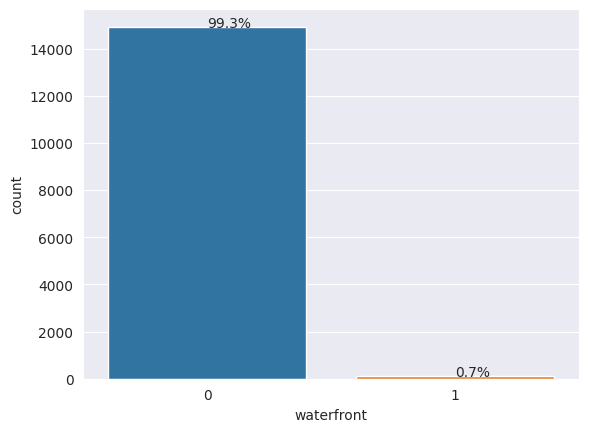

In [32]:
cnt_plot = sns.countplot(train_df.waterfront)
for p in cnt_plot.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    cnt_plot.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y))

* waterfront의 비율이 매우 낮음

In [33]:
train_df[train_df.sqft_above + train_df.sqft_basement != train_df.sqft_living]
#sqft_living  = sqft_above + sqft_basement

Empty DataFrame
Columns: [id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, yr_recent_built]
Index: []

[0 rows x 21 columns]

In [34]:
change_rate_15 = abs(train_df.sqft_living+train_df.sqft_lot - train_df.sqft_living15 - train_df.sqft_lot15) / (train_df.sqft_living+train_df.sqft_lot) * 100

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 100.0)

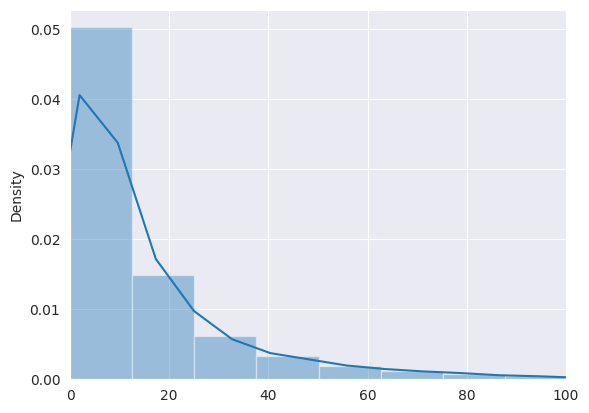

In [35]:
f, ax = plt.subplots()
sns.distplot(change_rate_15 , kde = True, bins = 120)
ax.set_xlim(0,100)

In [36]:
living_change_rate_15 = abs(train_df.sqft_living - train_df.sqft_living15) / (train_df.sqft_living)
lot_change_rate_15 = abs(train_df.sqft_lot - train_df.sqft_lot15) / (train_df.sqft_lot)

In [37]:
test_living_change_rate_15 = abs(test_df.sqft_living - test_df.sqft_living15) / (test_df.sqft_living)
test_lot_change_rate_15 = abs(test_df.sqft_lot - test_df.sqft_lot15) / (test_df.sqft_lot)

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


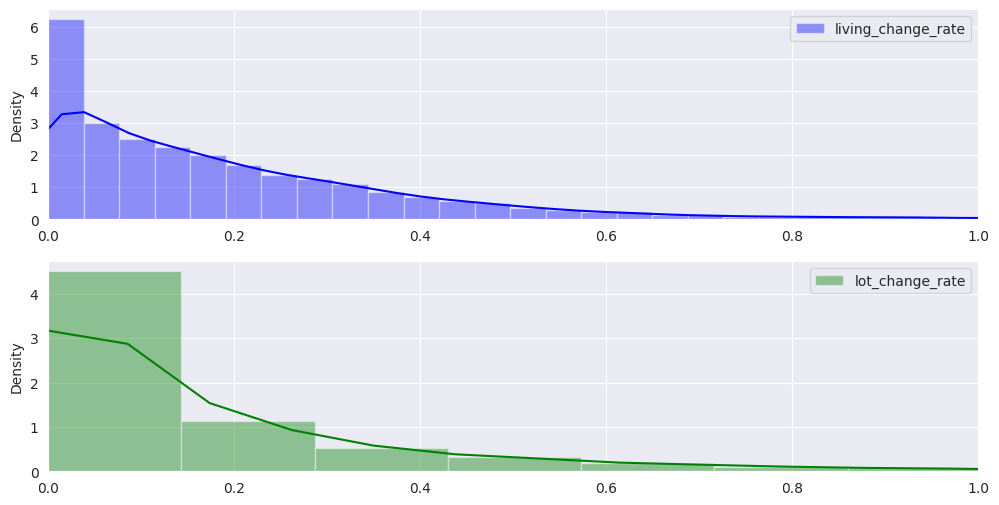

In [38]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(12,6)

sns.distplot(living_change_rate_15 , kde = True, bins = 120 , label="living_change_rate", ax = axes[0], color = 'blue')
sns.distplot(lot_change_rate_15 , kde = True, bins = 120 , label="lot_change_rate", ax = axes[1], color = 'green')
axes[0].set_xlim(0,1)
axes[0].legend()
axes[1].set_xlim(0,1)
axes[1].legend()

In [39]:
train_df["living_change_rate_15"] = living_change_rate_15
train_df["lot_change_rate_15"] = lot_change_rate_15
train_df.head(10)

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  221900.0         3       1.00         1180      5650     1.0   
1   1  180000.0         2       1.00          770     10000     1.0   
2   2  510000.0         3       2.00         1680      8080     1.0   
3   3  257500.0         3       2.25         1715      6819     2.0   
4   4  291850.0         3       1.50         1060      9711     1.0   
5   5  662500.0         3       2.50         3560      9796     1.0   
6   6  468000.0         2       1.00         1160      6000     1.0   
7   7  310000.0         3       1.00         1430     19901     1.5   
8   8  400000.0         3       1.75         1370      9680     1.0   
9   9  530000.0         5       2.00         1810      4850     1.5   

   waterfront  view  condition  ...  yr_built  yr_renovated  zipcode      lat  \
0           0     0          3  ...      1955             0    98178  47.5112   
1           0     0          3  ...      1933             0    98028  47.7379   
2           0     0          3  ...      1987             0    98074  47.6168   
3           0     0          3  ...      1995             0    98003  47.3097   
4           0     0          3  ...      1963             0    98198  47.4095   
5           0     0          3  ...      1965             0    98007  47.6007   
6           0     0          4  ...      1942             0    98115  47.6900   
7           0     0          4  ...      1927             0    98028  47.7558   
8           0     0          4  ...      1977             0    98074  47.6127   
9           0     0          3  ...      1900             0    98107  47.6700   

      long  sqft_living15  sqft_lot15  yr_recent_built  living_change_rate_15  \
0 -122.257           1340        5650             1955               0.135593   
1 -122.233           2720        8062             1933               2.532468   
2 -122.045           1800        7503             1987               0.071429   
3 -122.327           2238        6819             1995               0.304956   
4 -122.315           1650        9711             1963               0.556604   
5 -122.145           2210        8925             1965               0.379213   
6 -122.292           1330        6000             1942               0.146552   
7 -122.229           1780       12697             1927               0.244755   
8 -122.045           1370       10208             1977               0.000000   
9 -122.394           1360        4850             1900               0.248619   

   lot_change_rate_15  
0            0.000000  
1            0.193800  
2            0.071411  
3            0.000000  
4            0.000000  
5            0.088914  
6            0.000000  
7            0.361992  
8            0.054545  
9            0.000000  

[10 rows x 23 columns]

In [40]:
test_df["living_change_rate_15"] = test_living_change_rate_15
test_df["lot_change_rate_15"] = test_lot_change_rate_15

In [41]:
"""train_df["living_change_rate_15"] = train_df.living_change_rate_15.astype(int)
train_df["lot_change_rate_15"] =train_df.lot_change_rate_15.astype(int)
train_df.head(10)"""

"""test_df["living_change_rate_15"] = test_df.living_change_rate_15.astype(int)
test_df["lot_change_rate_15"] =test_df.lot_change_rate_15.astype(int)"""

'test_df["living_change_rate_15"] = test_df.living_change_rate_15.astype(int)\ntest_df["lot_change_rate_15"] =test_df.lot_change_rate_15.astype(int)'

change_rate_15 = 15년도 면적측정시 이전 면적측정과 달라진 정도  
floor = x.5 인 data들과 y (정수)인 data들 15년도 면적 측정시 변화율 비교해 볼 것

In [42]:
"""tmp_df = pd.DataFrame(living_change_rate_15)
tmp_df.columns = ["rate"]
tmp_df["rate"] = np.round(tmp_df.rate)
tmp_df["rate"] = tmp_df.rate.astype(int)
tmp_df = tmp_df.rate.value_counts()
tmp_df = pd.DataFrame(tmp_df)
tmp_df = tmp_df.reset_index()
tmp_df.columns = ["rate", "counts"]
tmp_df.head(10)

tmp_df["cum_counts"] = tmp_df.counts.cumsum()
tmp_df["percetage"] = tmp_df.counts / train_df.shape[0]
tmp_df = tmp_df.sort_values(by = "rate")
tmp_df["cum_percentage"] = tmp_df.percetage.cumsum() * 100
tmp_df["cum_cat"] = pd.cut(tmp_df.cum_percentage, 5, labels = range(1,6))
tmp_df["cum_cat"] = tmp_df.cum_cat.astype(int)
tmp_df_living = tmp_df[["rate","cum_cat"]]
tmp_df_living.columns = ["living_change_rate_15", "Liv_Change_cat"]
train_df = pd.merge(train_df, tmp_df_living, on = "living_change_rate_15")"""

'tmp_df = pd.DataFrame(living_change_rate_15)\ntmp_df.columns = ["rate"]\ntmp_df["rate"] = np.round(tmp_df.rate)\ntmp_df["rate"] = tmp_df.rate.astype(int)\ntmp_df = tmp_df.rate.value_counts()\ntmp_df = pd.DataFrame(tmp_df)\ntmp_df = tmp_df.reset_index()\ntmp_df.columns = ["rate", "counts"]\ntmp_df.head(10)\n\ntmp_df["cum_counts"] = tmp_df.counts.cumsum()\ntmp_df["percetage"] = tmp_df.counts / train_df.shape[0]\ntmp_df = tmp_df.sort_values(by = "rate")\ntmp_df["cum_percentage"] = tmp_df.percetage.cumsum() * 100\ntmp_df["cum_cat"] = pd.cut(tmp_df.cum_percentage, 5, labels = range(1,6))\ntmp_df["cum_cat"] = tmp_df.cum_cat.astype(int)\ntmp_df_living = tmp_df[["rate","cum_cat"]]\ntmp_df_living.columns = ["living_change_rate_15", "Liv_Change_cat"]\ntrain_df = pd.merge(train_df, tmp_df_living, on = "living_change_rate_15")'

In [43]:
"""tmp_df = pd.DataFrame(lot_change_rate_15)
tmp_df.columns = ["rate"]
tmp_df["rate"] = np.round(tmp_df.rate)
tmp_df["rate"] = tmp_df.rate.astype(int)
tmp_df = tmp_df.rate.value_counts()
tmp_df = pd.DataFrame(tmp_df)
tmp_df = tmp_df.reset_index()
tmp_df.columns = ["rate", "counts"]

tmp_df["cum_counts"] = tmp_df.counts.cumsum()
tmp_df["percetage"] = tmp_df.counts / train_df.shape[0]
tmp_df = tmp_df.sort_values(by = "rate")
tmp_df["cum_percentage"] = tmp_df.percetage.cumsum() * 100
tmp_df["cum_cat"] = pd.cut(tmp_df.cum_percentage, 5, labels = range(1,6))
tmp_df["cum_cat"] = tmp_df.cum_cat.astype(int)
tmp_df_living = tmp_df[["rate","cum_cat"]]
tmp_df_living.columns = ["lot_change_rate_15", "Lot_Change_cat"]
train_df = pd.merge(train_df, tmp_df_living, on = "lot_change_rate_15")
train_df.head(10)"""

'tmp_df = pd.DataFrame(lot_change_rate_15)\ntmp_df.columns = ["rate"]\ntmp_df["rate"] = np.round(tmp_df.rate)\ntmp_df["rate"] = tmp_df.rate.astype(int)\ntmp_df = tmp_df.rate.value_counts()\ntmp_df = pd.DataFrame(tmp_df)\ntmp_df = tmp_df.reset_index()\ntmp_df.columns = ["rate", "counts"]\n\ntmp_df["cum_counts"] = tmp_df.counts.cumsum()\ntmp_df["percetage"] = tmp_df.counts / train_df.shape[0]\ntmp_df = tmp_df.sort_values(by = "rate")\ntmp_df["cum_percentage"] = tmp_df.percetage.cumsum() * 100\ntmp_df["cum_cat"] = pd.cut(tmp_df.cum_percentage, 5, labels = range(1,6))\ntmp_df["cum_cat"] = tmp_df.cum_cat.astype(int)\ntmp_df_living = tmp_df[["rate","cum_cat"]]\ntmp_df_living.columns = ["lot_change_rate_15", "Lot_Change_cat"]\ntrain_df = pd.merge(train_df, tmp_df_living, on = "lot_change_rate_15")\ntrain_df.head(10)'

In [44]:
#train_df.drop(["Liv_Change_cat", "Lot_Change_cat"], axis=1, inplace=True)

In [45]:
train_df["has_basement"] = np.where(train_df.sqft_basement != 0, 1, 0)
test_df["has_basement"] = np.where(test_df.sqft_basement != 0, 1, 0)

<AxesSubplot:xlabel='sqft_living'>

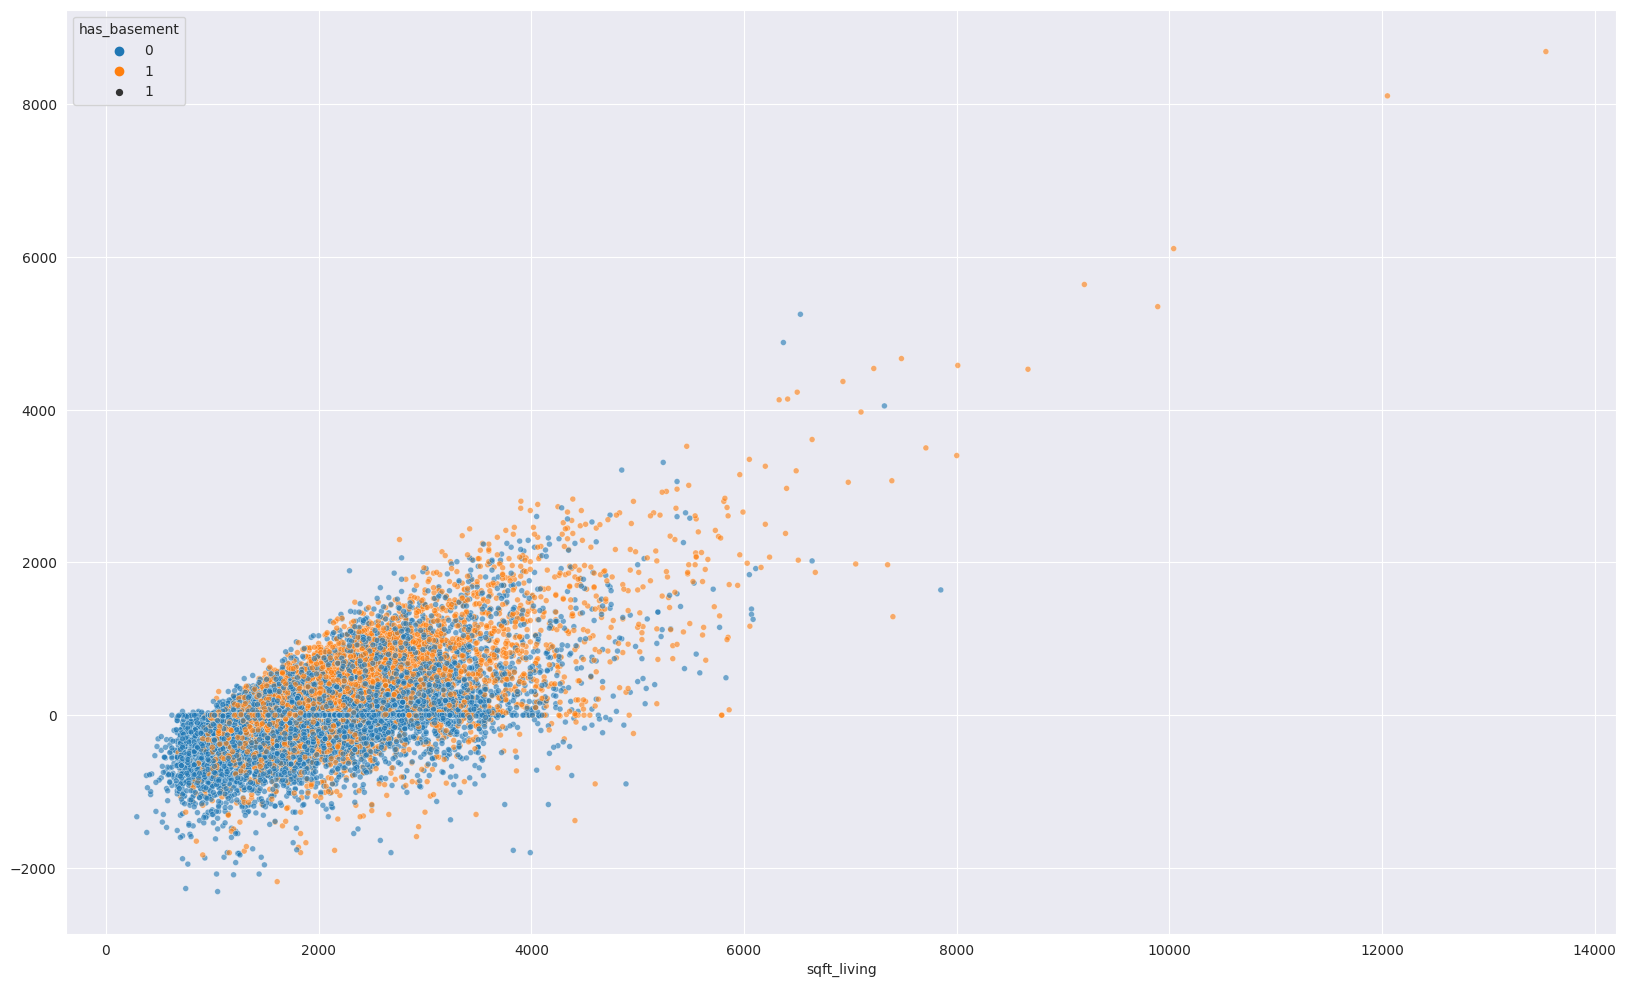

In [46]:
plt.figure(figsize = (20,12))
sns.scatterplot(x=train_df.sqft_living, y=(train_df.sqft_living - train_df.sqft_living15), hue=train_df.has_basement, size =1 , alpha = 0.6)

<Figure size 2000x1200 with 0 Axes>

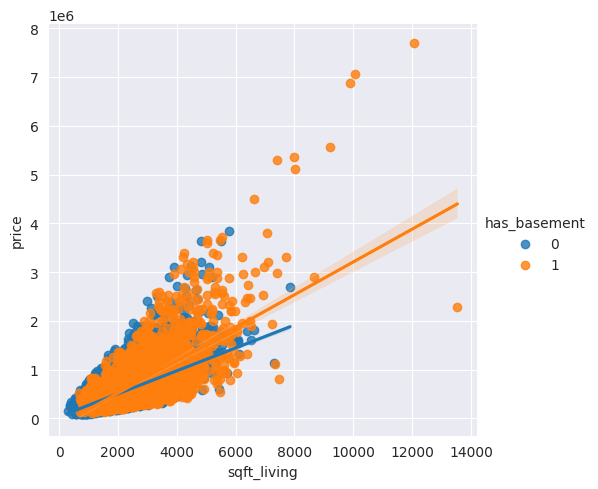

In [47]:
plt.figure(figsize = (20,12))
sns.lmplot(x="sqft_living", y="price", hue="has_basement", data=train_df)

<AxesSubplot:>

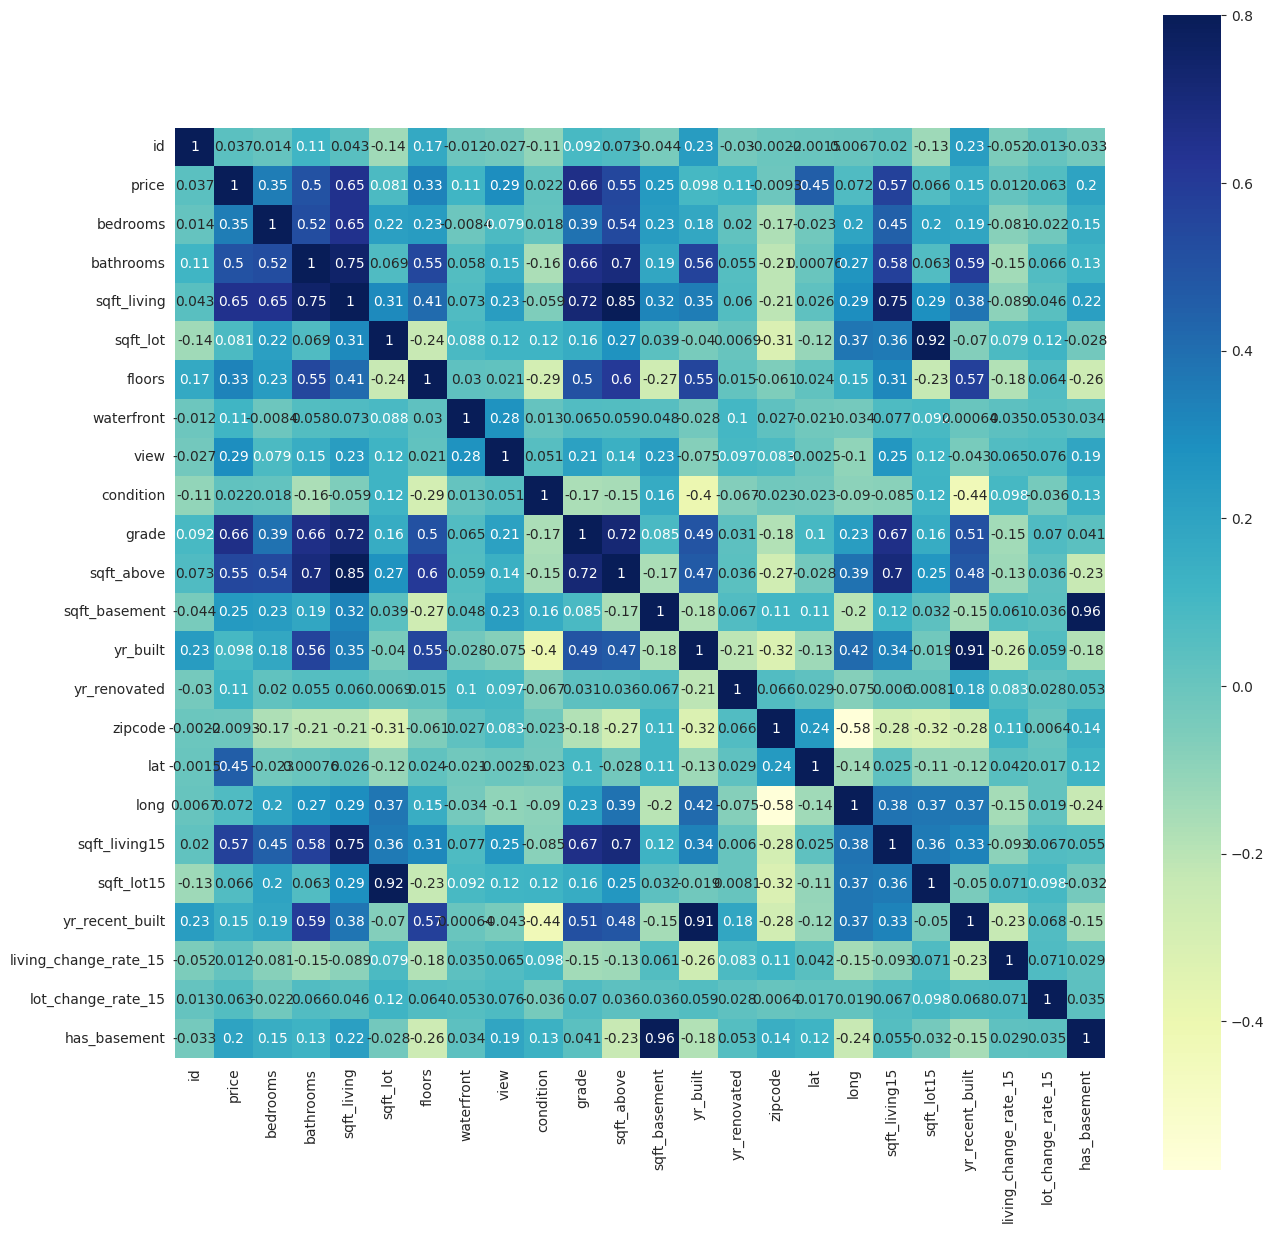

In [48]:
plt.figure(figsize=(15,15))
cor = train_df.corr(method="spearman")
sns.heatmap(cor, square=True ,cmap = "YlGnBu", annot=True, vmax=.8)

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


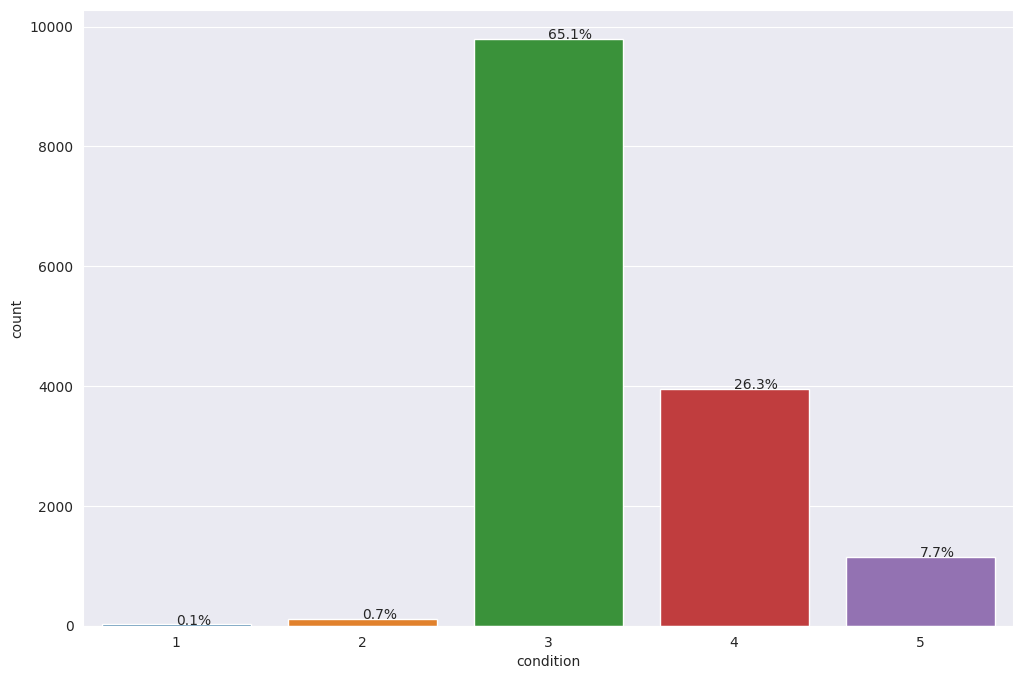

In [49]:
plt.figure(figsize=(12,8))
cnt_plot = sns.countplot(train_df.condition)
for p in cnt_plot.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    cnt_plot.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y))

condition이 grade에 얼마나 영향을 미치는가?

In [50]:
pd.DataFrame(train_df[["condition", "grade"]].groupby(["condition","grade"]).size()).reset_index().pivot("condition","grade",0)

grade       1    3     4     5      6       7       8       9      10     11  \
condition                                                                      
1          1.0  NaN   1.0   6.0    8.0     5.0     NaN     NaN    NaN    NaN   
2          NaN  1.0   3.0   8.0   39.0    46.0    10.0     1.0    2.0    NaN   
3          NaN  NaN  12.0  76.0  709.0  3668.0  2956.0  1452.0  631.0  234.0   
4          NaN  NaN   7.0  59.0  466.0  1958.0   979.0   316.0  112.0   46.0   
5          NaN  1.0   NaN  25.0  184.0   551.0   262.0    86.0   36.0    8.0   

grade        12   13  
condition             
1           NaN  NaN  
2           NaN  NaN  
3          48.0  7.0  
4          11.0  2.0  
5           2.0  NaN

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


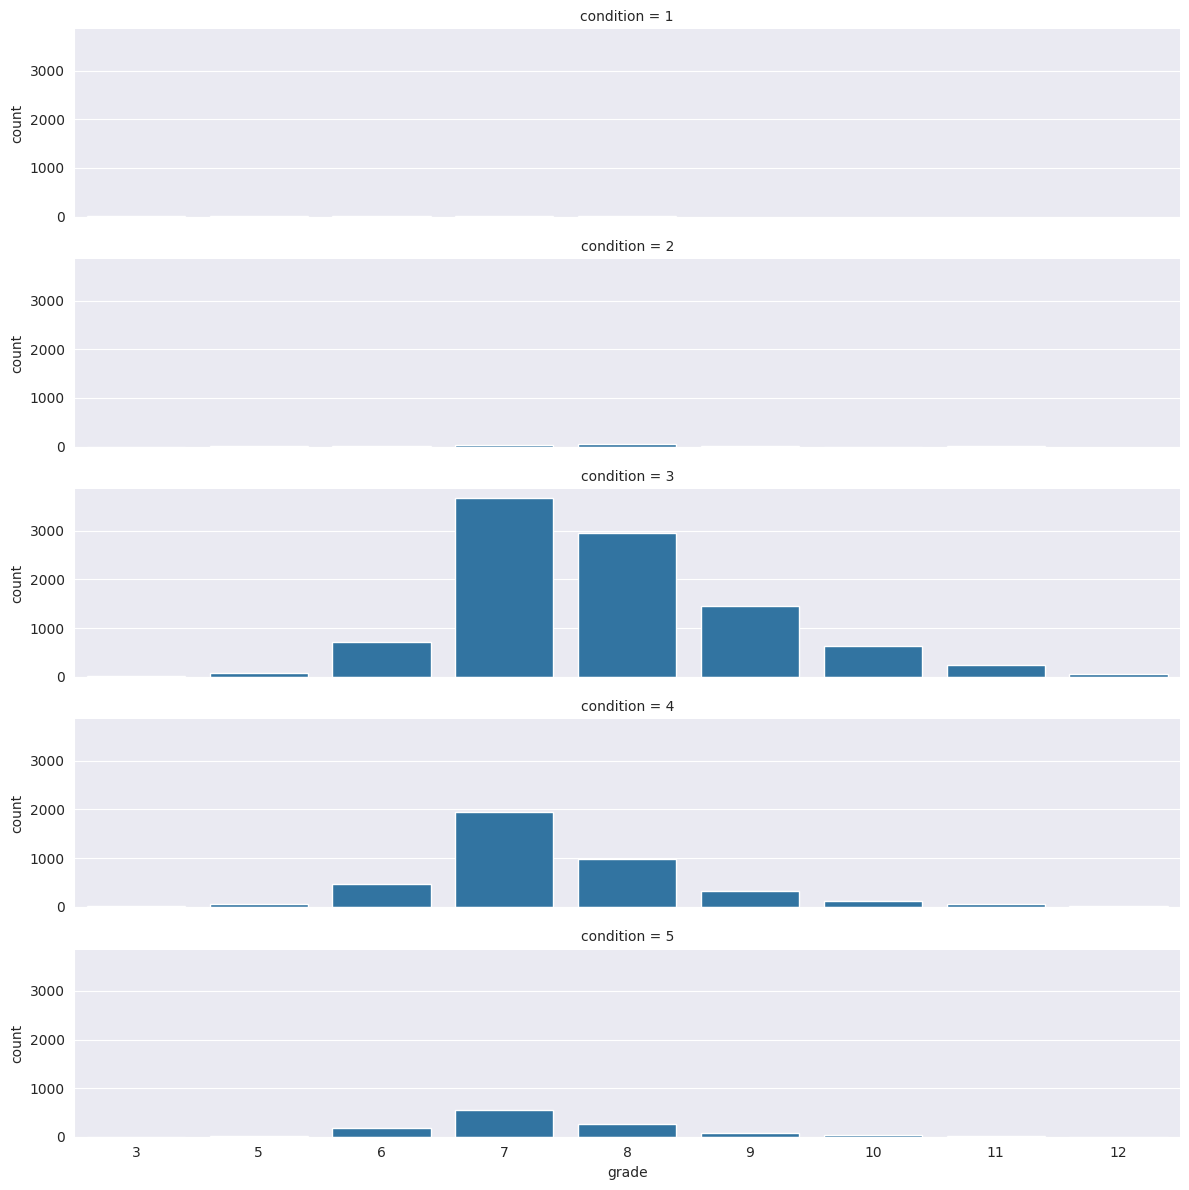

In [51]:
f = sns.FacetGrid(data = train_df, row="condition", height=2.4, aspect=5)
f.map(sns.countplot,"grade")

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='count'>

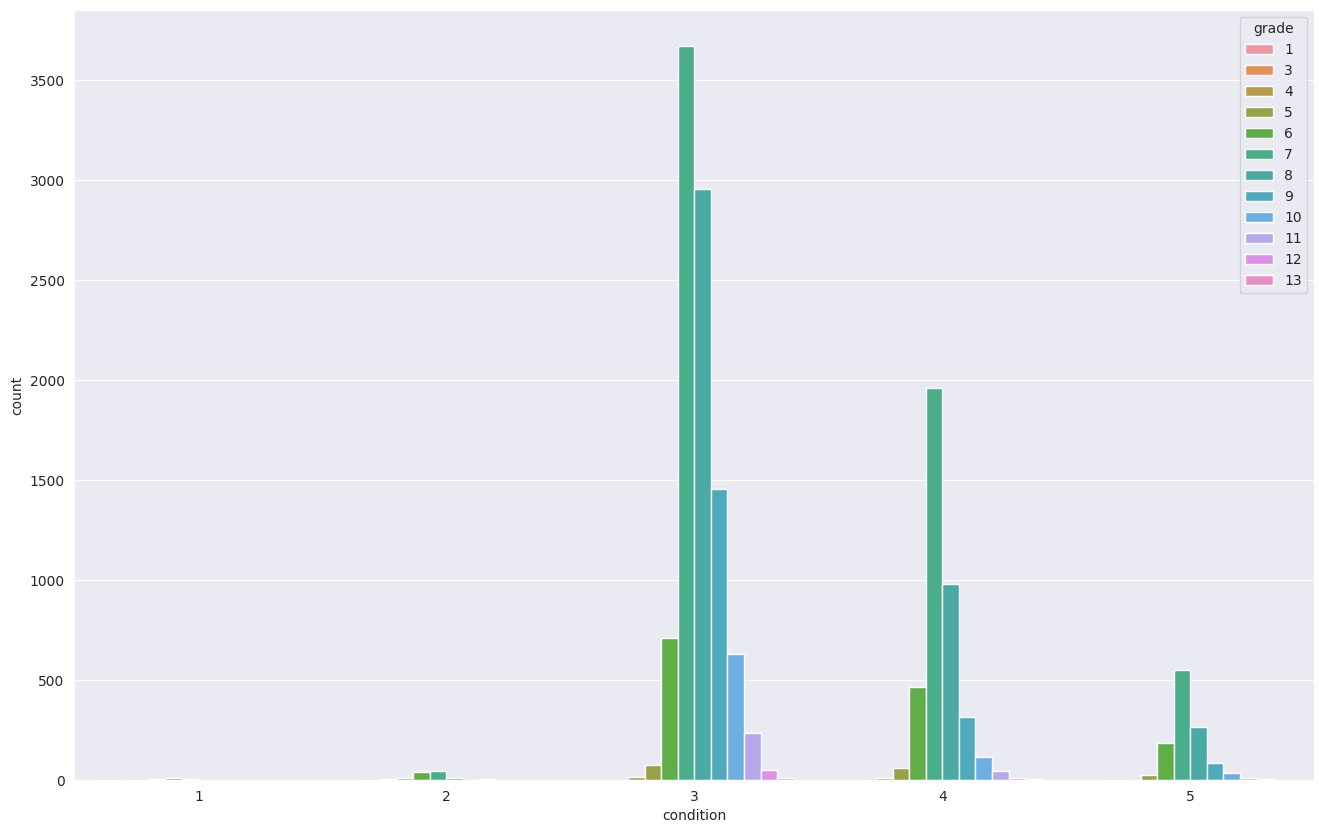

In [52]:
plt.figure(figsize = (16,10))
sns.countplot(train_df.condition, hue=train_df.grade)

condition = 1 or 2인 경우 data자체가 매우 적음  
condition = 3,4,5 => 그래프를 보면 condition이 grade에 큰 영향을 주는것 같아 보이진 않음

> Feature create

In [53]:
train_df["sqft_all"] = train_df.sqft_living + train_df.sqft_lot
train_df["sqft_all_15"] = train_df.sqft_living15 + train_df.sqft_lot15

test_df["sqft_all"] = test_df.sqft_living + test_df.sqft_lot
test_df["sqft_all_15"] = test_df.sqft_living15 + test_df.sqft_lot15

In [54]:
livingByLot = np.divide(train_df.sqft_living, train_df.sqft_lot)
livingByLot15 = np.divide(train_df.sqft_living15, train_df.sqft_lot15)

train_df["LivingByLot"] = livingByLot
train_df["LivingByLot15"] = livingByLot15

test_livingByLot = np.divide(test_df.sqft_living, test_df.sqft_lot)
test_livingByLot15 = np.divide(test_df.sqft_living15, test_df.sqft_lot15)

test_df["LivingByLot"] = test_livingByLot
test_df["LivingByLot15"] = test_livingByLot15

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


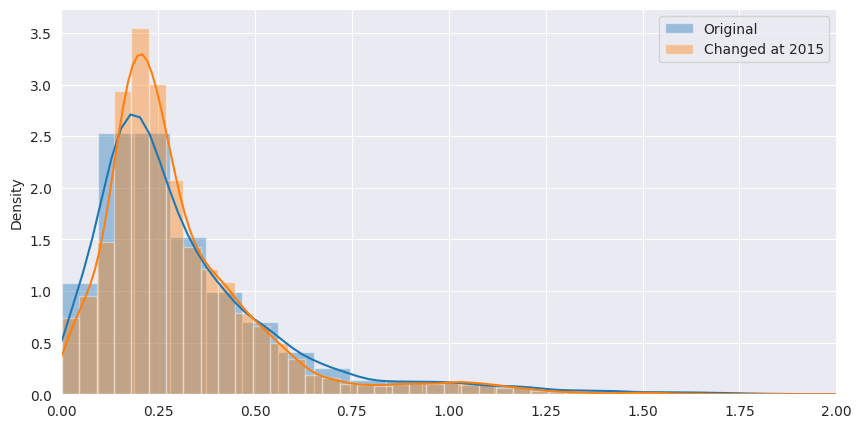

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.distplot(livingByLot, ax = ax, kde=True, label = "Original")
sns.distplot(livingByLot15, ax = ax, kde=True, label = "Changed at 2015")
ax.set_xlim(0,2)
ax.legend()

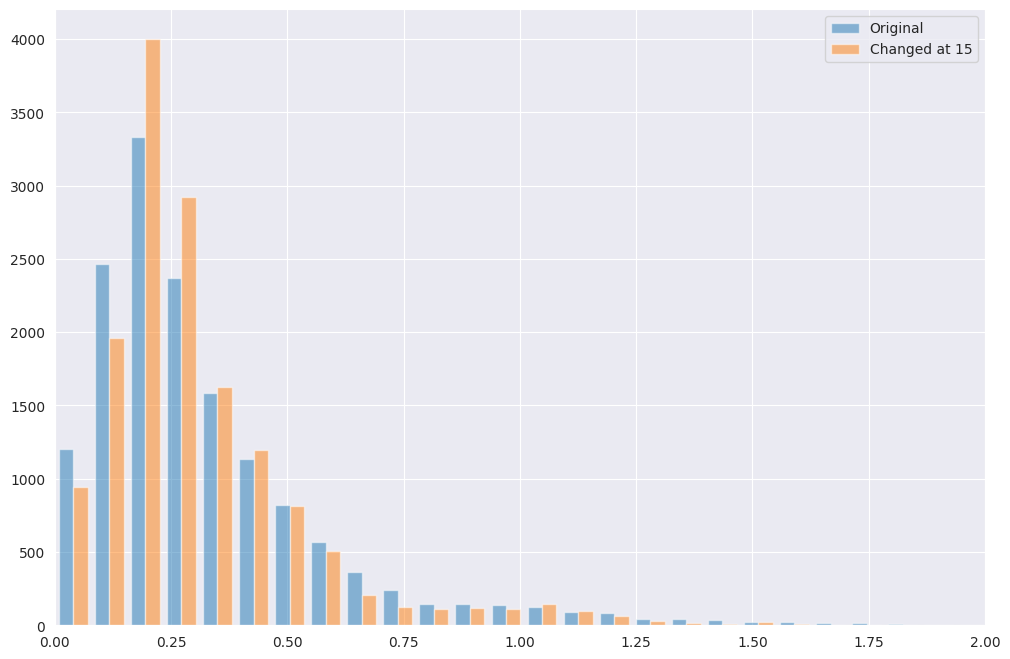

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist([livingByLot, livingByLot15], histtype = 'bar', bins=60, align='mid', label=['Original', 'Changed at 15'], alpha = 0.5)
ax.set_xlim(0,2)
ax.legend()

작게 측정되었던 면적이 커지고, 크게 측정되었던 면적이 작아짐. 좀 더 중앙밀집형

In [57]:
tmp_index = livingByLot[livingByLot >= 1].index
train_df.iloc[tmp_index,:][["floors"]].groupby("floors").size()

floors
1.5      2
2.0    270
2.5     23
3.0    226
3.5      3
dtype: int64

Living / Lot 이 floor와 연관이 커 보임

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

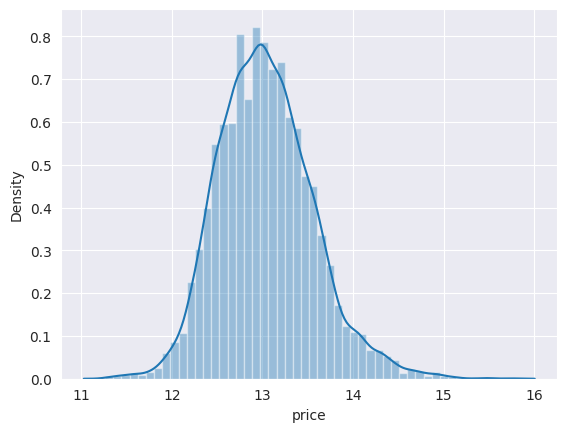

In [58]:
sns.distplot(np.log(train_df[(train_df.floors % 1 == 0)].price))

/home/cho/anaconda3/envs/0114EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

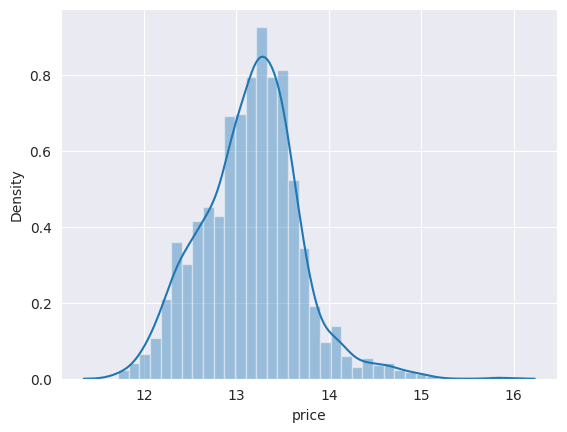

In [59]:
sns.distplot(np.log(train_df[(train_df.floors % 1 != 0)].price))

<AxesSubplot:xlabel='long', ylabel='lat'>

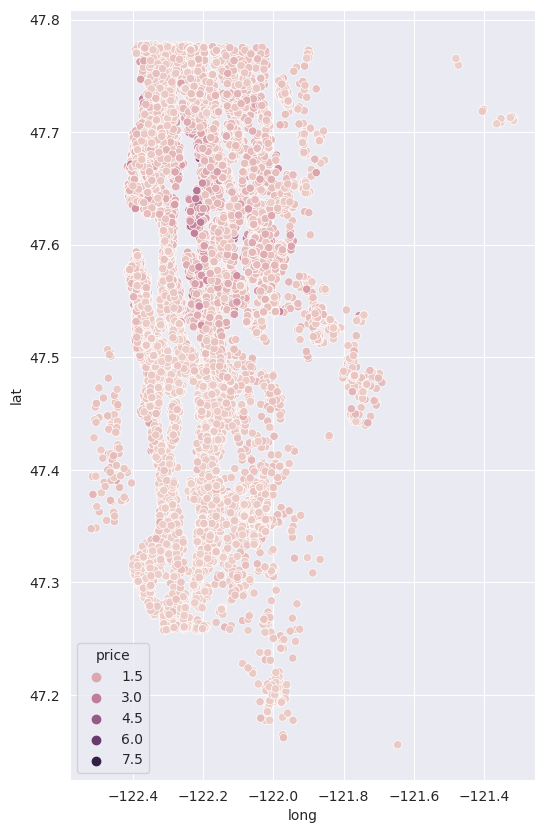

In [60]:
plt.figure(figsize = (6,10))
sns.scatterplot(x="long", y="lat", hue="price", data=train_df )

In [61]:
train_df["price_per_sqft"] = train_df.price / train_df.sqft_living

CPU times: user 380 ms, sys: 130 ms, total: 510 ms
Wall time: 364 ms


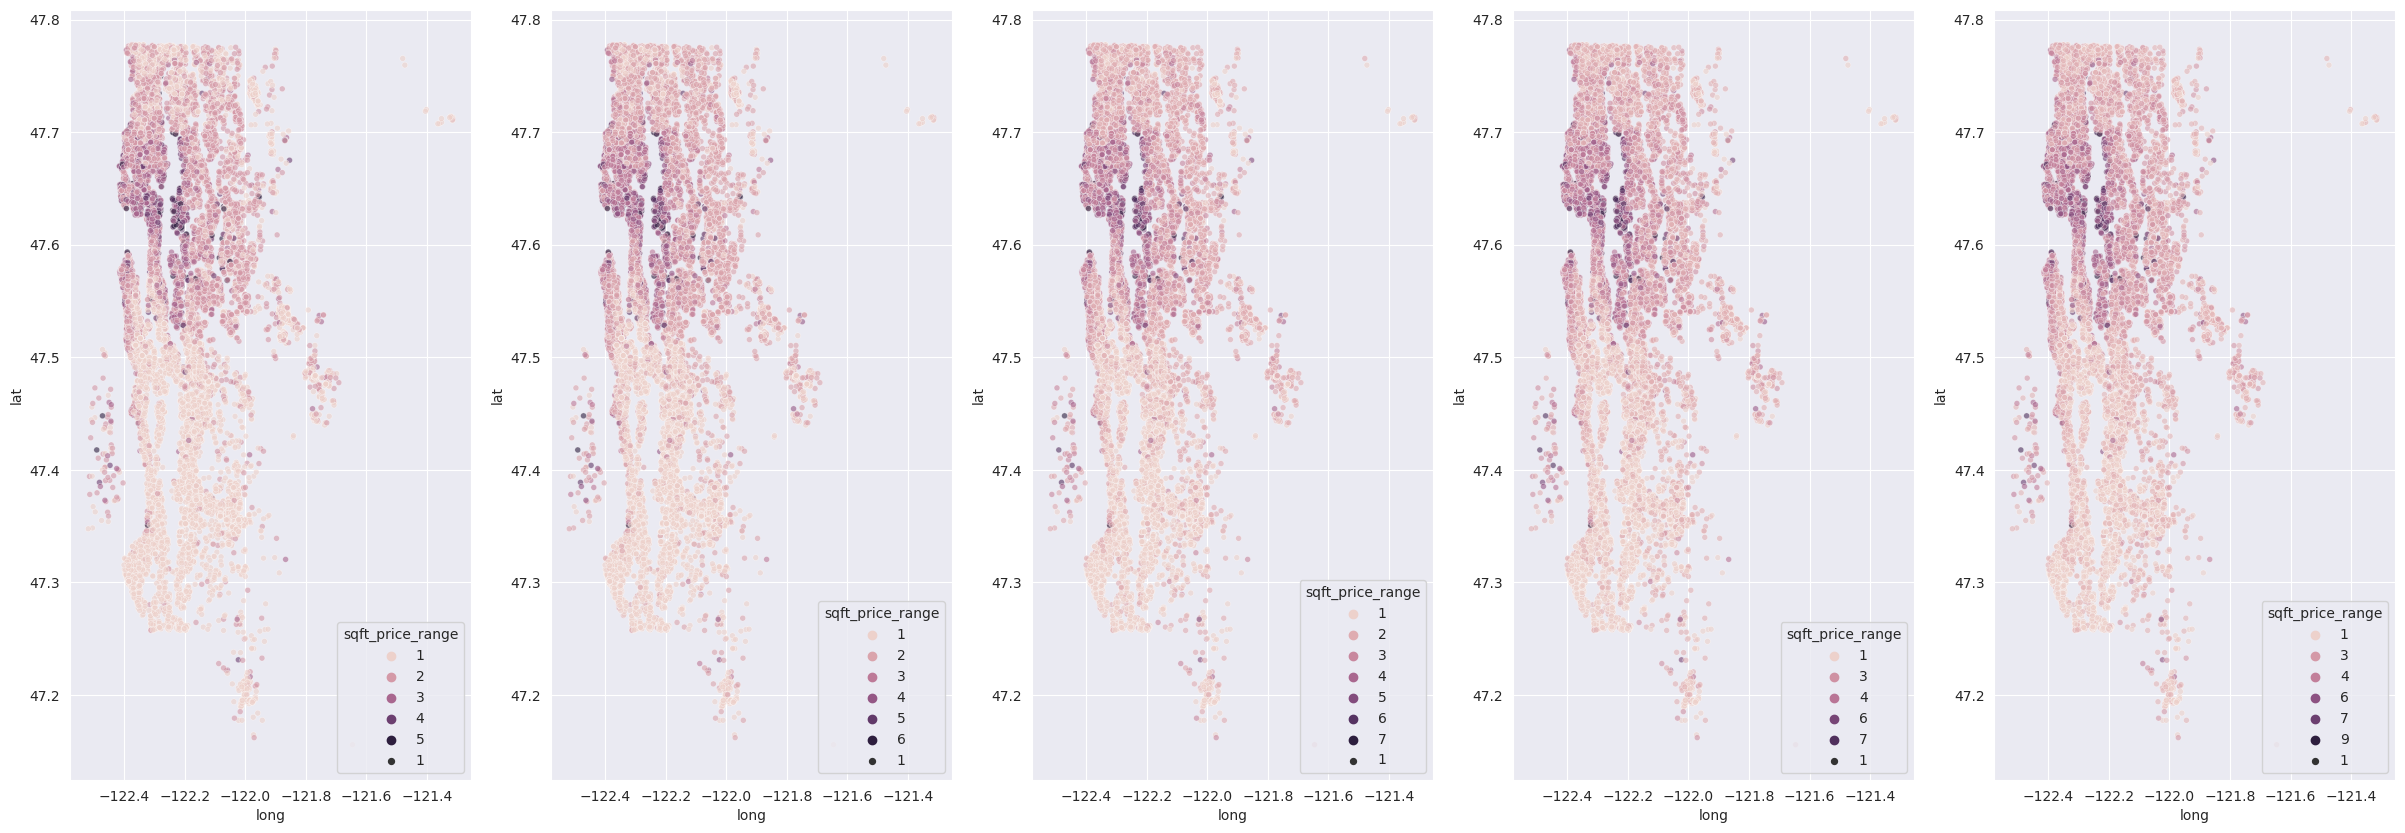

In [62]:
%%time
fig, axes = plt.subplots(ncols = 5)
fig.set_size_inches(30,10)
for i in range(5,10):
    price_cut = pd.cut(train_df.price_per_sqft, i, labels = range(1,i+1))
    train_df["sqft_price_range"] = price_cut
    train_df["sqft_price_range"] = train_df.sqft_price_range.astype(int)
    sns.scatterplot(x="long", y="lat", hue="sqft_price_range",data=train_df, ax = axes[i-5], size =1, alpha=0.6)

In [63]:
#train_df.drop("sqft_price_range", axis=1, inplace = True)
#N값 변화시키면서 몇개의 cluster로 나눌지 생각

<AxesSubplot:xlabel='long', ylabel='lat'>

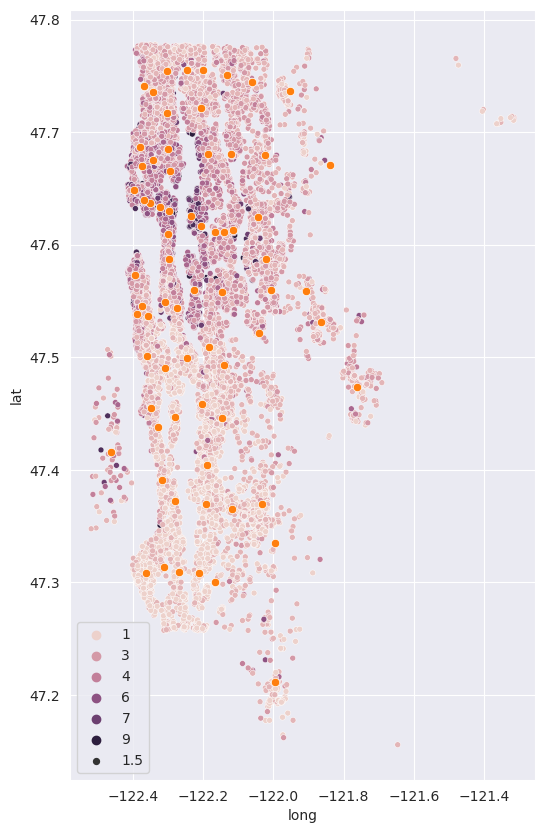

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(6,10)
sns.scatterplot(x= "long", y="lat", hue="sqft_price_range", data = train_df, size =1.5, ax = ax)
sns.scatterplot(x="long", y="lat",data = train_df[["long","lat","zipcode","price_per_sqft"]].groupby("zipcode").mean(), ax = ax)
#train_df[["long","lat","zipcode","price_per_sqft"]].groupby("zipcode").mean()

In [65]:
#train_df[["long","lat","zipcode","sqft_price_range"]].groupby("zipcode").mean()
tmp_cut = pd.DataFrame(pd.cut(train_df[["long","lat","zipcode","sqft_price_range"]].groupby("zipcode").mean().sqft_price_range, 10, labels = range(1,11))).reset_index()
tmp_cut.columns = ["zipcode", "cluster"]

In [66]:
tmp_point_df = pd.merge(train_df[["long","lat","zipcode","sqft_price_range"]].groupby("zipcode").mean().reset_index(), tmp_cut, on = "zipcode")
tmp_point_df["cluster"] = tmp_point_df.cluster.astype(int)

<AxesSubplot:xlabel='long', ylabel='lat'>

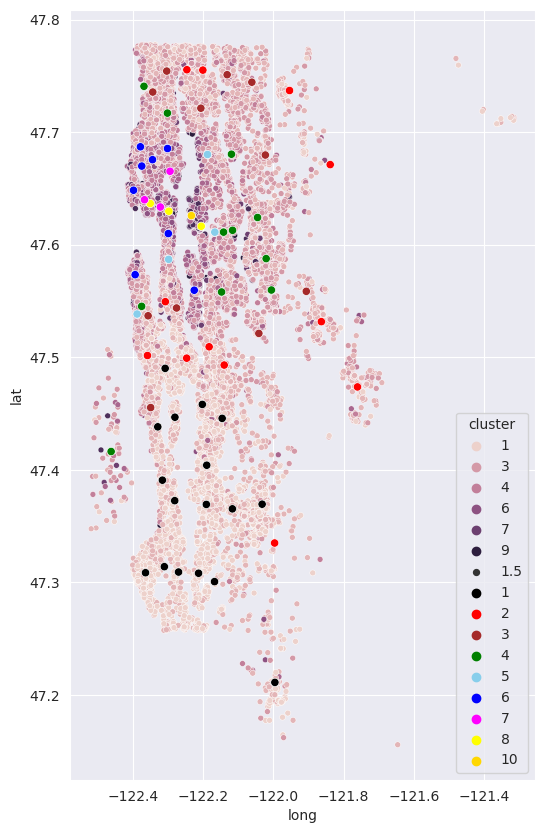

In [67]:
zip_cluter = tmp_point_df[["zipcode", "cluster"]]

fig, ax = plt.subplots()
fig.set_size_inches(6,10)
sns.scatterplot(x= "long", y="lat", hue="sqft_price_range", data = train_df, size =1.5, ax = ax)
sns.scatterplot(x="long", y="lat",data = tmp_point_df, hue="cluster", ax = ax, palette=['black','red','brown','green','skyblue','blue','magenta','yellow','gold'], legend='full')

In [68]:
#zip_cluster의 개수를 바꿔가며 모델의 성능을 봐야할 듯

In [69]:
train_df = pd.merge(train_df, zip_cluter, on = "zipcode")
test_df = pd.merge(test_df, zip_cluter, on = "zipcode")

In [70]:
mean_price_By_zipcode = train_df.groupby("zipcode").mean()["price_per_sqft"].reset_index()
mean_price_By_zipcode.columns = ["zipcode", "mean_price"]
var_price_By_zipcode = np.square(train_df.groupby("zipcode").std()["price_per_sqft"]).reset_index()
var_price_By_zipcode.columns = ["zipcode", "var_price"]

<AxesSubplot:xlabel='cluster', ylabel='mean_price'>

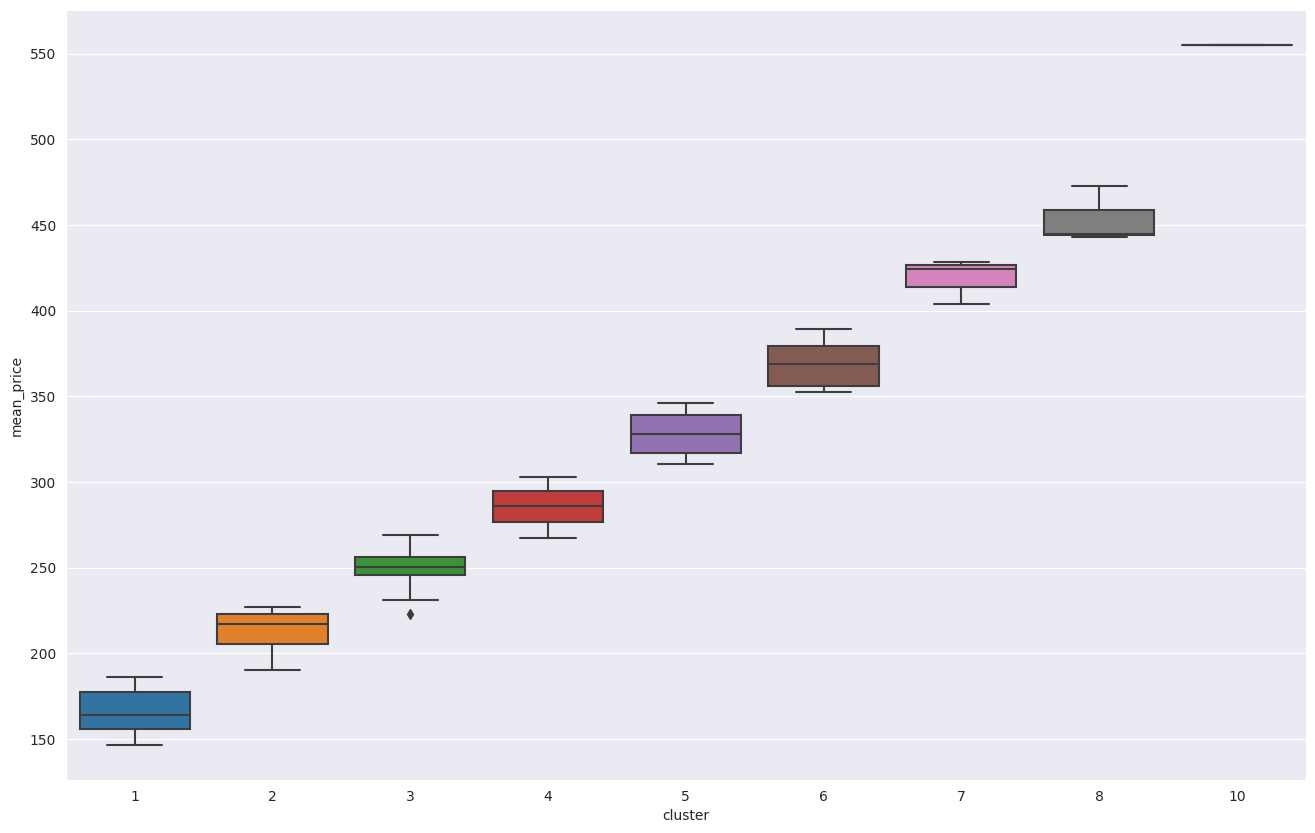

In [71]:
plt.figure(figsize=(16,10))
sns.boxplot(x="cluster", y="mean_price", data = pd.merge(mean_price_By_zipcode, zip_cluter))

In [72]:
tmp = pd.merge(mean_price_By_zipcode, var_price_By_zipcode)
train_df = pd.merge(train_df, tmp)

test_df = pd.merge(test_df, tmp)

In [73]:
#grade, condition, view, floors, bedrooms, bathrooms

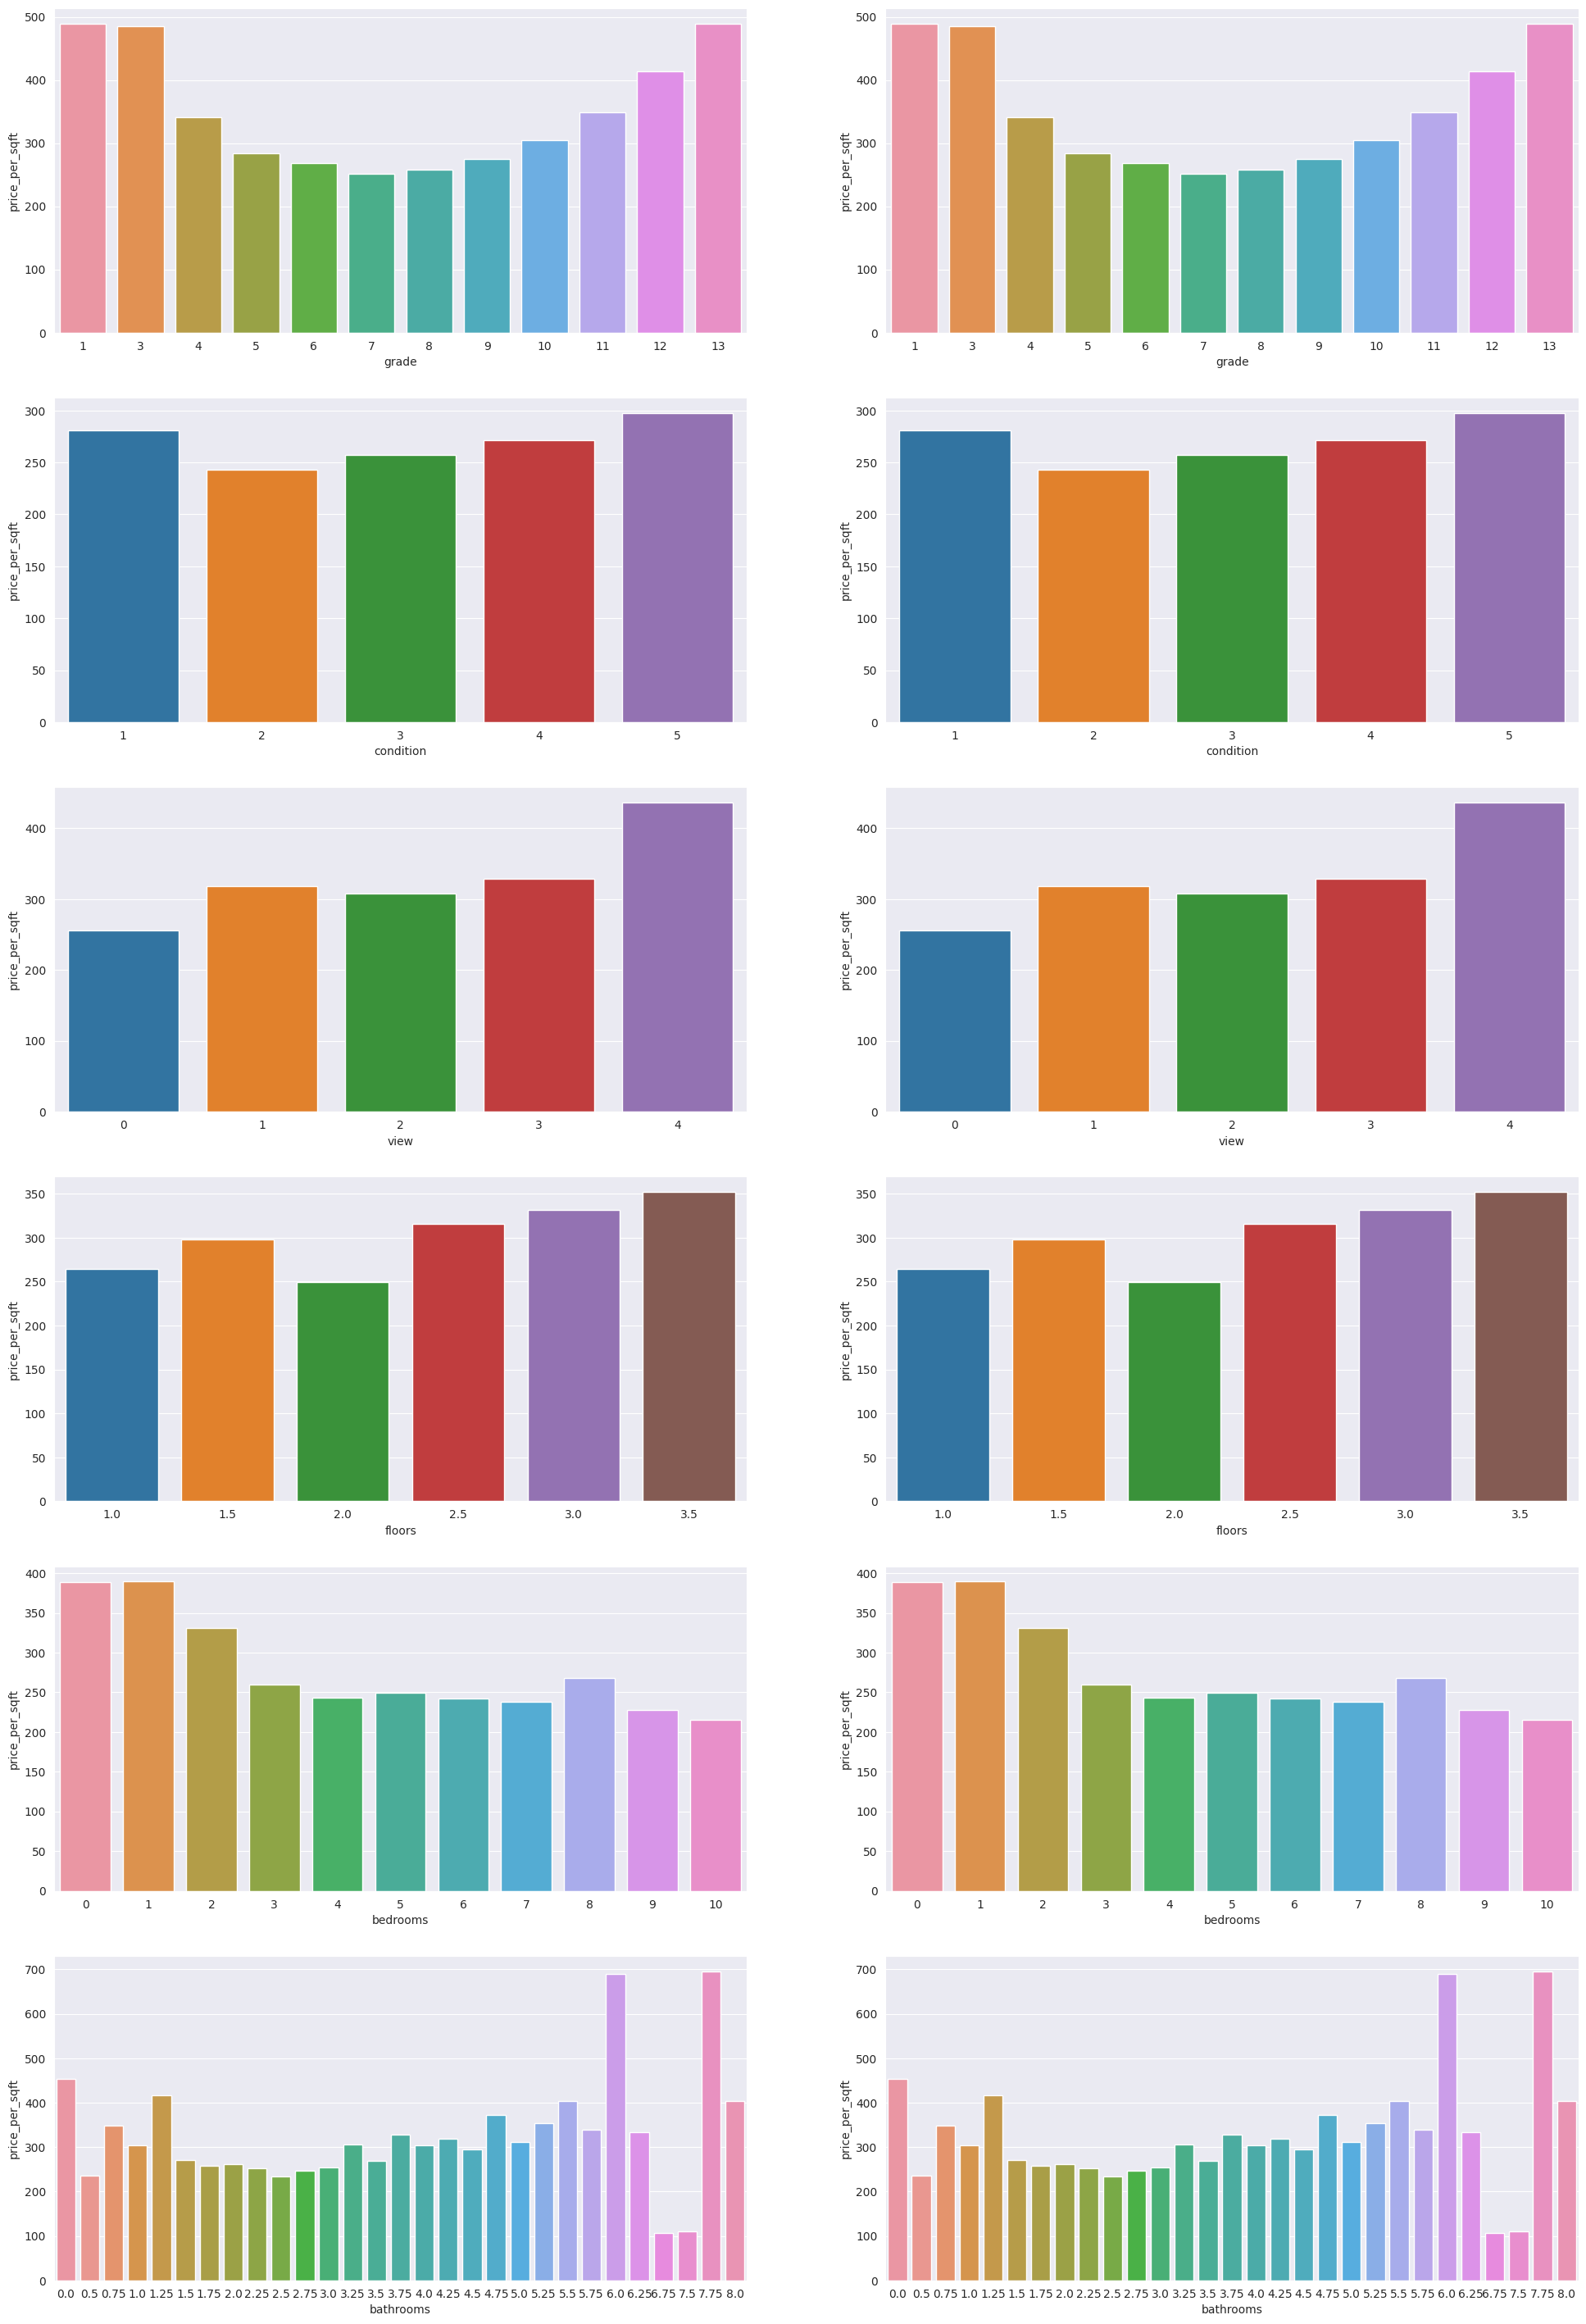

In [74]:
cat_cols = ["grade", "condition", "view", "floors", "bedrooms", "bathrooms"]

fig , axes = plt.subplots(ncols=2, nrows =6)
fig.set_size_inches(24,36)
i = 0
for col in cat_cols:
    mean_tmp_df = train_df.groupby(col).mean()["price_per_sqft"].reset_index()
    var_tmp_df = np.square(train_df.groupby(col).std()["price_per_sqft"]).reset_index()
    sns.barplot(x = col , y = "price_per_sqft", data = mean_tmp_df ,ax = axes[i][0])
    sns.barplot(x = col , y = "price_per_sqft", data = mean_tmp_df ,ax = axes[i][1])
    i += 1

이상치들로 인하여 결과값이 이상하게 보이는 것들도 있고, price와 상관관계가 크게 없는 변수들도 존재

<AxesSubplot:>

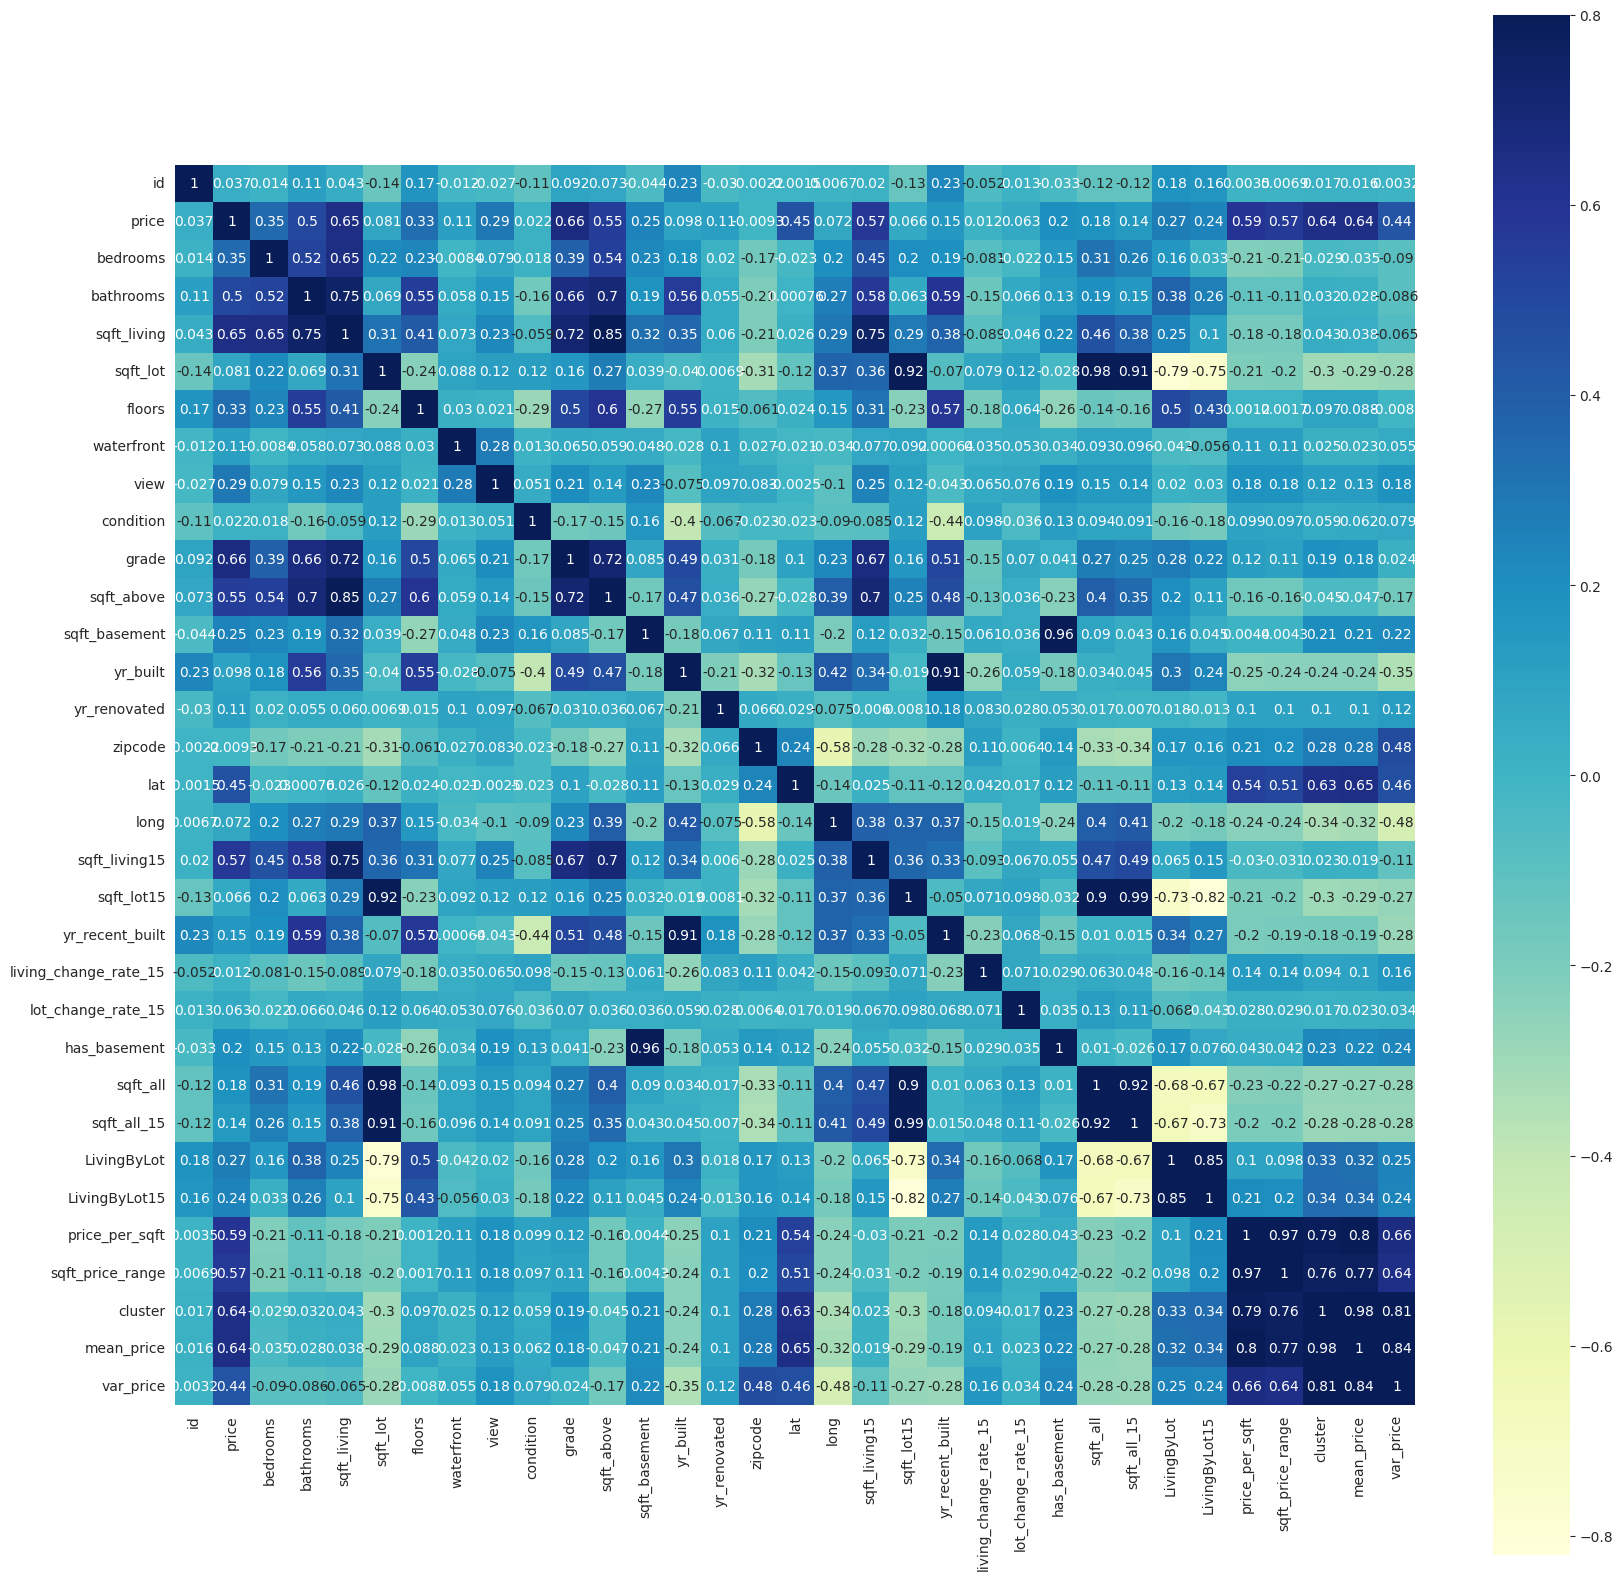

In [75]:
plt.figure(figsize = (20,20))
cor = train_df.corr(method="spearman")
sns.heatmap(cor, square=True, annot=True, vmax=.8, cmap = "YlGnBu")

['price' 'grade' 'sqft_living' 'mean_price' 'cluster' 'price_per_sqft'
 'sqft_living15' 'sqft_price_range' 'sqft_above' 'bathrooms']


<AxesSubplot:>

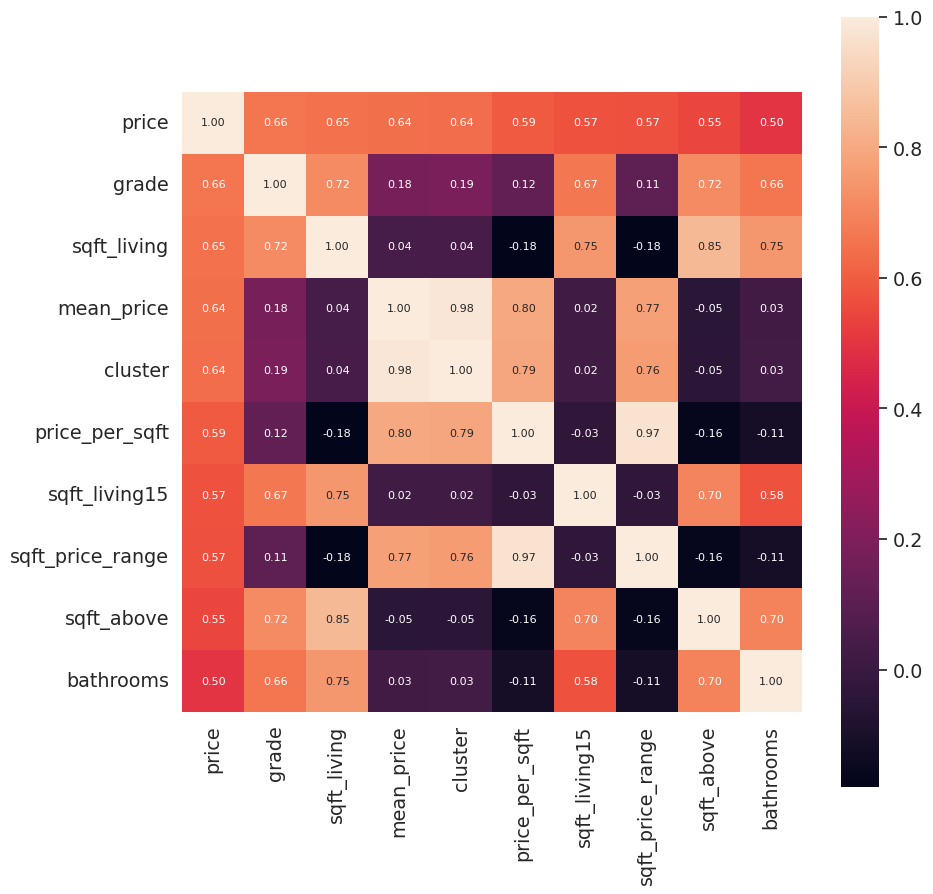

In [76]:
import scipy as sp

cor_abs = abs(train_df.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='price').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(train_df[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

In [77]:
train_df.drop(["sqft_price_range","price_per_sqft"], axis=1, inplace=True)

In [78]:
skewed_col = ["mean_price","var_price","sqft_living", "sqft_lot", "sqft_living15","sqft_lot15", "sqft_all", "sqft_all_15", "LivingByLot","LivingByLot15", "living_change_rate_15", "lot_change_rate_15", "sqft_above","sqft_basement"]

In [79]:
for col in skewed_col:
    train_df[col] = np.log1p(train_df[col].values)

for col in skewed_col:
    test_df[col] = np.log1p(test_df[col].values)

### Modeling


In [80]:
print("Shape of Train_df : {} \nShape of Test_df : {}".format(train_df.shape, test_df.shape))

Shape of Train_df : (15035, 31) 
Shape of Test_df : (6468, 30)


In [81]:
train_df = train_df.sort_values(by="id").set_index("id").reset_index()
test_df = test_df.sort_values(by="id").set_index("id").reset_index()
#train_X, valid_X, train_y, valid_y = train_test_split(train_df.drop("price", axis=1), train_df.price, test_size=0.2, random_state=123)

In [82]:
train_columns = train_df.drop(["id","price"], axis=1).columns.tolist()

In [83]:
train_df["price"] = np.log(train_df.price)

In [86]:
param = {'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.02,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4950}

y_reg = train_df['price']

folds = KFold(n_splits=10, shuffle=True, random_state=42)

oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df)):
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][train_columns], label=y_reg.iloc[trn_idx])#, categorical_feature=categorical_feats)
    val_data = lgb.Dataset(train_df.iloc[val_idx][train_columns], label=y_reg.iloc[val_idx])#, categorical_feature=categorical_feats)
    
    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data,val_data])
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][train_columns], num_iteration = clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = train_columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    #predictions
    predictions += clf.predict(test_df[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
cv = np.sqrt(mean_squared_error(oof, y_reg))
print(cv)
    

0.1632856402035393


In [87]:
lgb_predictions = np.exp(predictions)
lgb_predictions

array([ 537296.65945709,  483283.59023076, 1294840.85993906, ...,
        493777.63581985,  326256.80828246,  461270.04554364])

In [88]:
xgb_params = {
    'max_depth' : 6,
    'learning_rate' : 0.02,
    'n_estimator' : 100,
    'objective' : 'reg:squarederror',
    'eval_metric' : 'rmse',
    'colsample_bytree' : 0.6,
    'subsample' : 0.8,
    'seed' : 123
}

In [89]:
train_X = train_df[train_columns]
train_y = train_df['price']
test_X = test_df[train_columns]

In [90]:
dtrain = xgb.DMatrix(train_X, train_y)
dtest = xgb.DMatrix(test_X)

cv_output = xgb.cv(xgb_params,
                  dtrain,
                  num_boost_round=5000,
                  early_stopping_rounds=300,
                  nfold=5,
                  verbose_eval=100,
                  show_stdv = False)


[02:35:54] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:54] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:54] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

In [91]:
cv_output.columns

Index(['train-rmse-mean', 'train-rmse-std', 'test-rmse-mean', 'test-rmse-std'], dtype='object')

Text(0.5, 1.0, 'RMSE_log')

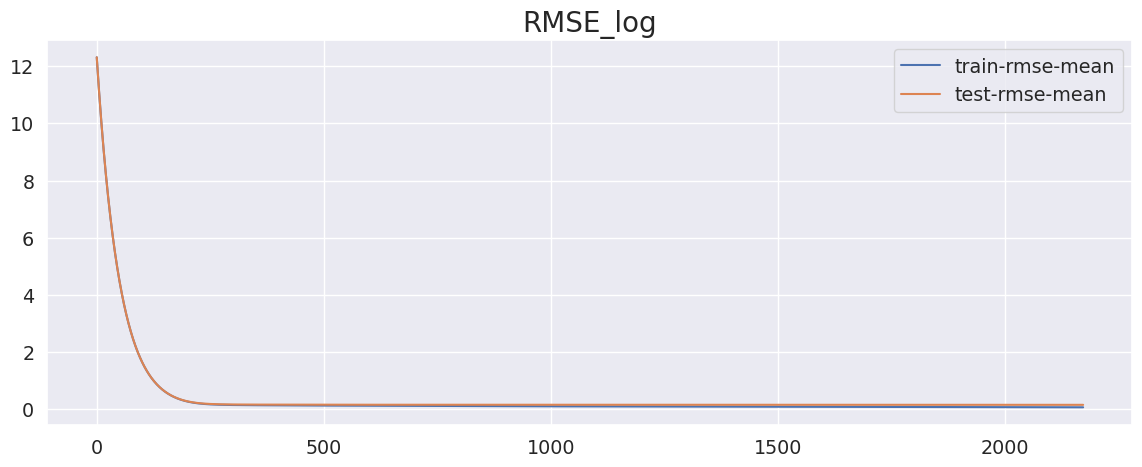

In [92]:
best_rounds = cv_output.index.size
score = round(cv_output.iloc[-1]['test-rmse-mean'], 2)

# plotting
fig, ax1 = plt.subplots(1, 1, figsize=(14,5))
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot(ax=ax1)
ax1.set_title('RMSE_log', fontsize=20)

In [93]:
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=best_rounds)

[02:37:08] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [94]:
xgb_pred = xgb_model.predict(dtest)
xgb_pred = np.exp(xgb_pred)

In [95]:
sub = pd.DataFrame({'id' : test_df.id.values,
             'price' : lgb_predictions})

In [96]:
xgb_sub = pd.DataFrame({'id' : test_df.id.values,
             'price' : xgb_pred})

In [97]:
sub.to_csv('./data/copy_submission.csv', index=False)
xgb_sub.to_csv('./data/copy_xgb_submisson.csv', index=False)